# Viewing geometries

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime

In [2]:
start_date = datetime(2022, 4, 11, 14, 32)
end_date = datetime(2022, 4, 11, 16, 4)

In [3]:
from pyresample import load_area
area_def = load_area('area.yaml', 'world') 

# GMI data

In [4]:
from pansat.products.satellite.gpm import l1c_gpm_gmi_r
#files = l1c_gpm_gmi_r.download(start_date, start_date)
files = ["GPM/1C-R.GPM.GMI.XCAL2016-C.20220411-S143206-E160438.046124.V05A.HDF5"]

## GOES data

In [5]:
from pansat.products.satellite.goes import GOES16L1BRadiances
goes = GOES16L1BRadiances("F", [10])
#files = goes.download(start_date, end_date)

In [6]:
files

['GPM/1C-R.GPM.GMI.XCAL2016-C.20220411-S143206-E160438.046124.V05A.HDF5']

In [7]:
times = []
for filename in sorted(files):
    try:
        times.append(goes.filename_to_date(filename.name))
    except:
        pass

In [8]:
times

[]

In [9]:
times = [goes.filename_to_date(f.name) for f in files]

AttributeError: 'str' object has no attribute 'name'

In [50]:
import re

In [52]:
goes.filename_regexp.match(files[0].name).group(2)

'20221011520206'

In [54]:
goes.filename_to_date(files[0].name)

datetime.datetime(2022, 4, 11, 15, 20, 20)

In [46]:
from pathlib import Path
files = list(Path("GOES-16/GOES-16-ABI-L1b-RadF/").glob("*.nc"))
times = [goes.filename_to_date(f.name) for f in files]

AttributeError: 'NoneType' object has no attribute 'group'

In [33]:
from pathlib import Path

In [240]:
from satpy import Scene
goes_ir = []
for filename in sorted(files):
    print(filename)
    try:
        scene = Scene([str(filename)])
        scene.load(["C10"])
        scene_r = scene.resample(area_def)
        goes_ir.append(scene_r["C10"].compute())
    except:
        pass

GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C01_G16_s20221011750204_e20221011759512_c20221011759557.nc


[09:24:16] WARNING  No filenames found for reader: ahi_hrit                ]8;id=432594;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=229049;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=16699;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=759924;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=296319;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=732539;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=700220;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=508210;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=254198;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=776189;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=825365;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=142421;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=513730;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=923157;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

[09:24:17] INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=611628;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=791058;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=744450;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=492275;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=864856;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=765019;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=838558;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=723411;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=916438;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=420975;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=716099;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=122141;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=775393;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=745112;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=185214;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=318171;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=664475;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=25180;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=512750;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=283260;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=11536;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=606928;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=340522;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=238290;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=818251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=346960;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=709920;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=106309;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=812861;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=676980;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=715537;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=347984;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=694725;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=435180;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=947650;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=663192;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=489522;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=734114;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=338711;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=306076;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=99417;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=780704;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=939997;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=12633;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=677799;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=660156;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=366190;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=202004;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=939270;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=335521;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=87254;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=400874;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=572441;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=550960;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=290731;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=642553;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=526817;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=495669;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=245412;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=906378;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=32367;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=959763;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=791106;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=247014;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=649086;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=288852;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=352010;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=500986;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=402830;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=412212;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=32705;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=125197;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=800906;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=497093;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=123446;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=94976;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=957493;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=159021;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=583157;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=542660;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=797641;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=774634;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=751025;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=511021;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=330608;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=708528;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=750866;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=710856;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=305385;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=993258;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=622643;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=491675;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=273742;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=215783;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=455721;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=104501;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=342243;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=438748;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=462744;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=958802;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  Required file type 'c10' not found or loaded for 'C10' ]8;id=718023;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=444255;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#783\783]8;;\

           WARNING  The following datasets were not created and may require     ]8;id=168810;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/scene.py\scene.py]8;;\:]8;id=398158;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/scene.py#1184\1184]8;;\
                    resampling to be generated: DataID(name='C10',                           
                    wavelength=WavelengthRange(min=7.24, central=7.34,                       
                    max=7.44, unit='µm'), resolution=2000,                                   
                    calibration=<calibration.brightness_temperature>,                        
                    modifiers=())                                                            

GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C02_G16_s20221011750204_e20221011759512_c20221011759554.nc


           WARNING  No filenames found for reader: ahi_hrit                ]8;id=995477;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=47400;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=442990;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=106109;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=138972;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=554445;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=322538;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=156456;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=699617;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=987207;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:18] INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=805312;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=968741;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=102653;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=565306;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=760787;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=882381;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=717719;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=375104;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=706830;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=881086;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=244316;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=448121;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=824256;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=172965;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=144969;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=136420;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=693613;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=997802;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=843152;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=897583;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=355001;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=432968;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=418387;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=533141;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=72290;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=660843;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=139573;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=990496;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=774444;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=895349;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=558057;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=986541;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=430491;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=580276;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=110642;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=50886;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=200088;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=930503;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=725500;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=781735;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=315981;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=22228;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=148585;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=243894;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=962780;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=227059;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=164238;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=641073;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=467082;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=420960;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=342666;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=705897;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=941675;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=87082;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=838938;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=361233;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=466103;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=823360;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=700422;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=129205;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=800744;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=387175;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=290152;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=850927;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=307140;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=757141;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=256651;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=840383;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=421935;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=176353;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=983862;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=275371;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=445409;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=589355;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=485029;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=792880;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=275164;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=246820;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=131008;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=791627;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=269003;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=840053;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=576234;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=888903;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=202383;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=366934;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=777121;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=914194;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=86433;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=373890;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=806941;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=597755;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=746018;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=912818;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=146133;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=860406;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=736580;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=581861;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=299339;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=782182;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=648313;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=782601;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=39605;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=460870;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  Required file type 'c10' not found or loaded for 'C10' ]8;id=221025;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=915654;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#783\783]8;;\

           WARNING  The following datasets were not created and may require     ]8;id=326475;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/scene.py\scene.py]8;;\:]8;id=565915;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/scene.py#1184\1184]8;;\
                    resampling to be generated: DataID(name='C10',                           
                    wavelength=WavelengthRange(min=7.24, central=7.34,                       
                    max=7.44, unit='µm'), resolution=2000,                                   
                    calibration=<calibration.brightness_temperature>,                        
                    modifiers=())                                                            

GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C03_G16_s20221011750204_e20221011759512_c20221011759560.nc


[09:24:19] WARNING  No filenames found for reader: ahi_hrit                ]8;id=989158;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=95589;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=867361;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=511427;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=331975;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=179017;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=570310;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=303869;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=482701;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=727654;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=577153;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=648920;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=553560;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=401989;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=272169;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=659332;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=566124;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=212894;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=778428;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=29889;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=604888;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=302342;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=75915;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=844698;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=933686;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=386560;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=503553;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=499367;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=385975;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=442100;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=743636;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=793721;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=162539;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=568183;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=806658;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=815571;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=765726;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=357841;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=190504;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=334820;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=56701;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=849960;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=937525;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=492275;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=700949;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=689823;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=144044;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=463107;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=159927;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=661444;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=673964;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=907605;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=435597;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=448266;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=824739;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=457667;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=157092;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=306724;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=601052;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=935883;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=10235;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=552503;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=187958;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=562267;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=883885;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=249704;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=570418;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=969799;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=612923;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=139017;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=117667;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=827728;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=316909;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=331054;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=808713;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=125287;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=939798;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=391040;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=980869;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=748585;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=872625;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=864985;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=62878;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=728580;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=711876;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=629950;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=666225;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=667069;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:20] WARNING  No filenames found for reader: fci_l2_nc               ]8;id=384839;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=847063;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=197716;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=136270;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=340519;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=745325;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=952984;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=937553;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=940023;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=301957;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=19452;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=353414;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=840587;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=962871;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=50886;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=665470;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=366726;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=140988;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=174876;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=822274;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=160054;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=721289;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=24687;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=653644;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=378020;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=437078;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  Required file type 'c10' not found or loaded for 'C10' ]8;id=277685;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=70978;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#783\783]8;;\

           WARNING  The following datasets were not created and may require     ]8;id=236571;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/scene.py\scene.py]8;;\:]8;id=160752;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/scene.py#1184\1184]8;;\
                    resampling to be generated: DataID(name='C10',                           
                    wavelength=WavelengthRange(min=7.24, central=7.34,                       
                    max=7.44, unit='µm'), resolution=2000,                                   
                    calibration=<calibration.brightness_temperature>,                        
                    modifiers=())                                                            

GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011430206_e20221011439525_c20221011439574.nc


           WARNING  No filenames found for reader: ahi_hrit                ]8;id=51208;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=357062;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=425613;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=131244;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=356660;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=109086;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=825726;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=181191;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=631078;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=106785;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=872572;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=885939;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=196571;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=556372;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=563591;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=132210;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=900631;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=718076;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=808753;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=197731;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=241760;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=273319;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=832276;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=681801;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=724088;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=733241;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=82315;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=300453;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=236173;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=866489;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=970059;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=37878;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=207690;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=58292;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=701526;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=504168;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=170517;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=350262;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=302144;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=120997;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=90853;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=86201;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=557066;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=248829;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=344091;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=360099;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=115431;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=336016;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=601915;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=300627;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=196346;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=272905;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=397465;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=932288;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=525343;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=806018;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=303390;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=546717;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=740854;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=822532;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=509212;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=621649;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=528229;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=232436;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=746734;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=380994;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=438705;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=590431;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=481557;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=844004;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=714488;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=153346;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=131287;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=463476;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=902076;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=795375;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=37458;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=331155;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=134826;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=526036;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=167599;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=985111;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=906853;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=747778;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:21] WARNING  No filenames found for reader: goes-imager_nc          ]8;id=266406;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=817711;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=47195;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=981346;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=182244;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=303857;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=744018;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=505217;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=978895;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=444691;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=931880;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=34993;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=897096;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=903859;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=702453;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=163343;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=396502;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=311483;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=400579;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=964320;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=673256;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=66458;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=791587;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=455754;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=96482;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=794619;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=931281;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=620733;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=772783;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=959494;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:22] INFO     Using default KDTree resampler                           ]8;id=432939;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=480981;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011440206_e20221011449525_c20221011449580.nc


[09:24:27] WARNING  No filenames found for reader: ahi_hrit                ]8;id=517004;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=411680;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=490036;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=31882;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=974379;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=567460;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=110870;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=679523;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=30001;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=149723;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=576563;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=320721;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=758371;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=224002;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=87125;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=132080;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=152922;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=181776;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=631930;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=427835;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=799686;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=270499;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=776403;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=723305;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=422371;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=315498;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=722983;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=782031;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=659683;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=17640;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=381492;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=269062;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=647920;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=170215;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=425231;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=381280;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=769444;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=31333;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=454674;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=958746;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=898778;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=663573;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=857458;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=380666;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=738215;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=269113;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=428105;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=913542;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=503677;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=962273;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:28] WARNING  No filenames found for reader: viirs_l1b               ]8;id=384450;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=125563;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=113152;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=156715;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=160345;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=290957;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=23336;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=984319;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=142054;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=613891;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=762795;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=304636;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=825800;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=455475;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=579543;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=464078;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=50147;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=118533;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=182056;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=944021;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=666473;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=111625;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=965490;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=235119;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=173232;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=617028;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=681375;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=821655;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=83833;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=956752;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=242778;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=614621;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=832619;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=486587;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=873913;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=75556;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=447257;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=87556;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=425760;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=492941;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=222219;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=382049;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=867073;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=833881;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=207484;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=123597;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=935839;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=547072;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=274676;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=56618;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=407297;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=103488;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=661979;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=823863;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=351037;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=617941;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=619007;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=769491;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=363883;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=252878;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=185884;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=194703;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=528527;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=671301;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:29] INFO     Using default KDTree resampler                           ]8;id=579582;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=698082;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011450206_e20221011459525_c20221011459571.nc


[09:24:35] WARNING  No filenames found for reader: ahi_hrit                ]8;id=49974;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=745361;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=777042;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=135519;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=755768;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=66142;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=320251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=9593;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=268608;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=30657;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=187382;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=611442;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=664240;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=279828;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=132480;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=727056;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=998765;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=832335;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=235097;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=789412;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=542283;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=785326;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=672143;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=436906;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=750626;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=110026;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=591849;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=87485;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=734710;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=837790;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=494792;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=915900;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=241526;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=664708;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=347209;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=249422;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=296686;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=233540;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=725792;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=854973;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=499807;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=32495;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=67788;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=834837;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=281777;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=154083;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=311931;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=642844;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=429579;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=733116;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=837487;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=525232;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=815309;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=37352;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=412562;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=55585;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=907563;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=948877;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=559292;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=209720;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=799816;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=391049;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=699047;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=535467;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=918761;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=515074;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=740858;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=7469;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=912614;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=431185;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=495560;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=10264;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=451322;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=371211;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=820785;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=144257;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=734614;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=635108;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=356601;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=519909;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=725955;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=425722;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=196897;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=45286;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=340784;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=769887;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=322393;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=291632;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=133096;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=237123;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=870993;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=545795;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=839869;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=642326;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=180486;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=255956;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=924660;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=300142;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=29864;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=557015;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=936612;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=632100;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=153480;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=738416;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=723052;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=192064;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=696821;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=830979;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=395391;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=351041;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=144225;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=519129;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=441586;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=749544;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:36] INFO     Using default KDTree resampler                           ]8;id=38870;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=821061;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011500206_e20221011509526_c20221011509573.nc


[09:24:42] WARNING  No filenames found for reader: ahi_hrit                ]8;id=481343;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=98925;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=378288;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=994349;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=540479;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=988526;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=99359;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=938837;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=887127;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=122723;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=29410;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=133424;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=60999;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=148808;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=898908;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=899780;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=655848;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=529144;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=376999;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=434089;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=665373;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=196133;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=335631;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=712577;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=90213;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=253646;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=914536;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=669334;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=496414;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=809787;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=587250;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=548064;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=239487;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=862507;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=181723;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=296147;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=313545;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=571356;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=158632;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=483912;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=957533;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=222085;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=471454;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=542392;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=505248;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=131109;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=467081;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=283126;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=974766;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=883992;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=866821;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=772915;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=608863;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=323693;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=893560;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=949849;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=478366;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=800187;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=13377;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=512384;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=346627;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=21107;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=502483;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=229161;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=757582;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=2004;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=836287;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=789739;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=530034;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=412534;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:43] WARNING  No filenames found for reader: slstr_l1b               ]8;id=31293;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=957775;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=57911;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=419845;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=150275;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=413345;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=79901;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=459065;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=72445;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=659185;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=433718;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=785402;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=857017;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=339756;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=890751;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=610593;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=905826;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=611586;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=916830;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=461520;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=997343;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=820988;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=728163;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=494873;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=682762;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=209370;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=413875;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=596689;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=485753;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=122229;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=144192;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=29447;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=968449;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=897240;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=490682;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=958436;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=242596;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=230827;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=237365;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=807213;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=535022;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=581793;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=287896;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=230281;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:44] INFO     Using default KDTree resampler                           ]8;id=947972;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=944611;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011510206_e20221011519525_c20221011519584.nc


[09:24:50] WARNING  No filenames found for reader: ahi_hrit                ]8;id=762656;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=929604;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=703882;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=298766;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=106410;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=219460;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=168163;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=605212;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=15849;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=445261;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=920344;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=581333;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=792825;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=864518;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=242651;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=22953;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=226515;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=655443;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=713268;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=856135;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=784963;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=719733;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=801642;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=702568;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=837344;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=998459;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=911409;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=148027;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=48058;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=337163;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=57165;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=244183;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=762385;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=930365;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=444434;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=945970;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=969550;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=845342;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=358185;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=681358;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=862425;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=857021;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=398941;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=562716;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=985129;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=411033;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=212346;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=141594;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=34158;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=980303;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=988137;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=288844;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=336242;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=702582;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=37753;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=230039;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=725604;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=524249;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=889554;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=869878;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=951594;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=493353;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=203193;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=490023;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=856443;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=363202;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=751069;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=837133;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=909897;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=367269;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=406982;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=159031;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=638516;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=306933;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=596773;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=142029;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=978027;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=109463;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=898534;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=295740;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=446484;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=693191;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=188328;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=895391;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=152152;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=476512;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=912911;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=370662;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=382573;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=109193;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=283406;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=618319;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=374608;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=209371;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=495133;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=864460;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=465788;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=667616;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=906908;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=382765;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=406020;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=741810;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=383721;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=676796;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=631919;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=831149;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=214394;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=825106;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=145239;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=86914;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=296510;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=411094;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=56119;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=215193;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:51] INFO     Using default KDTree resampler                           ]8;id=733846;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=347045;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011520206_e20221011529525_c20221011529570.nc


[09:24:57] WARNING  No filenames found for reader: ahi_hrit                ]8;id=657367;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=417669;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=240953;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=829283;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=17727;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=917414;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=401516;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=866456;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=500943;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=808046;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=826251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=521201;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=346923;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=551052;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=370556;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=771429;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=635703;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=172842;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=601179;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=515479;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=803346;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=642045;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=964249;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=290701;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=441322;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=277505;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=599743;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=881723;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=669274;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=104563;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=898847;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=929596;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=645257;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=346370;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=704668;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=904184;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=469695;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=171047;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=687391;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=183639;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=354244;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=849829;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=683224;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=511938;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=175985;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=528557;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=19824;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=134513;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=431822;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=773655;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=495681;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=197127;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=431763;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=833021;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=517913;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=720705;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=246863;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=318230;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=109607;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=425791;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=444417;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=979762;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=177646;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=848044;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=559162;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=574275;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=640090;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=525364;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=159515;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=506662;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=252612;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=691084;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=578102;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=714237;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=480857;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=283032;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=927370;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=486627;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=856657;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=567958;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=567865;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=863779;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=628089;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=387995;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:58] WARNING  No filenames found for reader: goes-imager_nc          ]8;id=9953;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=864028;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=892858;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=908702;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=937441;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=514950;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=105727;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=80330;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=287558;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=239122;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=186658;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=954368;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=106775;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=759836;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=406624;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=916847;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=937634;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=316157;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=765411;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=298351;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=700447;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=563510;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=829215;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=726400;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=843505;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=871496;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=898246;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=445242;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=349493;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=636315;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:24:59] INFO     Using default KDTree resampler                           ]8;id=10716;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=808444;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011530206_e20221011539525_c20221011539568.nc


[09:25:04] WARNING  No filenames found for reader: ahi_hrit                ]8;id=687038;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=182403;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=995162;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=316704;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=166504;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=341914;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=833306;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=326991;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=96204;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=403034;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=938997;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=39822;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=771183;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=113558;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=308370;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=749836;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=804780;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=824230;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=415196;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=362850;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=811211;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=621362;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=915294;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=186735;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=719049;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=346053;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=48545;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=298646;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=449713;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=66299;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=5054;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=569215;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=698613;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=549550;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=280794;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=348004;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=632662;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=808561;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:05] WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=345415;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=613430;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=639886;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=599592;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=82121;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=960163;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=184642;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=162722;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=176069;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=208076;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=288511;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=336420;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=853089;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=633494;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=66601;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=178932;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=783406;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=603043;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=17404;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=896097;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=871277;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=389653;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=984708;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=732916;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=729215;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=792654;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=955012;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=163315;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=400424;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=251355;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=527633;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=774925;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=11710;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=179120;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=791916;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=987646;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=203343;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=522948;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=711618;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=212581;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=730900;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=710669;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=750521;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=712337;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=704938;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=881535;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=227251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=657913;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=44987;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=134006;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=27957;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=95190;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=848681;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=282985;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=281257;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=362274;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=416045;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=641083;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=438824;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=574529;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=445352;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=315448;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=373106;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=76593;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=710645;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=783542;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=242991;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=761960;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=889864;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=113602;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=962683;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=914990;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=377166;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=574264;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=394403;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=613077;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:06] INFO     Using default KDTree resampler                           ]8;id=61107;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=15954;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011540206_e20221011549526_c20221011549571.nc


[09:25:12] WARNING  No filenames found for reader: ahi_hrit                ]8;id=996751;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=883269;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=463016;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=365275;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=760754;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=755949;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=413757;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=389513;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=799645;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=847431;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=650544;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=714755;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=746149;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=577927;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=346541;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=963058;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=300421;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=131429;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=736719;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=594488;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=450414;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=466619;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=978857;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=521489;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=752447;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=466515;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=462836;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=632932;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=979898;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=960905;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=999830;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=522358;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=655253;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=934302;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=390191;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=197145;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=868839;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=847798;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=798976;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=832027;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=244067;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=328919;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=791372;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=301213;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=515804;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=107530;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=341877;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=617416;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=674283;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=971510;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=665851;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=565084;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=382745;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=891924;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=509103;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=866303;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=996750;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=960947;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=684828;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=243674;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=2150;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=685135;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=434168;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=699814;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=372848;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=986711;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=241714;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=520679;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=829644;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=191104;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=854523;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=170049;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=747036;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=748760;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=663514;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=901001;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=669609;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=783860;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=640289;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=475689;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=325197;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=348296;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=759098;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=852675;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=959614;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=27794;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=802877;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=22094;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=585888;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=116975;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=106889;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=381367;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=580853;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=793998;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=342224;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=959739;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=596243;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=547100;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=209304;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=416095;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=891968;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=412211;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=976148;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=114528;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:13] WARNING  No filenames found for reader: viirs_compact           ]8;id=172711;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=330413;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=302343;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=376503;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=142684;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=882373;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=370496;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=766004;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=651440;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=395217;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:14] INFO     Using default KDTree resampler                           ]8;id=413122;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=950574;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011550206_e20221011559525_c20221011559567.nc


[09:25:19] WARNING  No filenames found for reader: ahi_hrit                ]8;id=396876;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=800165;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=520089;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=138189;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=920527;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=19180;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=667340;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=820808;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=753615;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=760048;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=183967;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=656598;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=607483;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=66792;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=220356;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=743292;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=989631;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=95328;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=716166;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=682388;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=829733;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=368380;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=409920;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=174627;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=756629;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=250483;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=445251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=100171;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=577511;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=21907;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=651719;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=169470;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=641420;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=44698;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=278060;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=20393;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=688842;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=378115;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:20] WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=127718;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=841525;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=521156;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=619056;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=667071;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=58086;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=138490;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=609827;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=211836;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=374315;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=115741;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=912752;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=125239;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=518547;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=643233;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=264309;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=943743;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=75265;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=494239;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=943545;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=604808;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=283260;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=66061;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=323090;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=725216;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=851493;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=210542;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=779403;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=472289;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=409501;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=994173;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=375648;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=165586;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=188414;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=800647;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=152427;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=264776;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=741297;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=227260;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=162773;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=457860;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=862268;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=728217;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=268431;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=858747;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=18143;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=15798;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=151725;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=527017;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=507354;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=343604;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=482190;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=475566;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=410017;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=899379;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=438218;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=916025;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=464908;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=494439;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=157295;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=607586;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=710151;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=346751;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=785086;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=171096;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=805201;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=813975;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=412817;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=80056;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=193165;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=480417;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=411959;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=304039;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=825262;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=512989;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=944547;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:21] INFO     Using default KDTree resampler                           ]8;id=171726;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=209145;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011600206_e20221011609526_c20221011609582.nc


[09:25:27] WARNING  No filenames found for reader: ahi_hrit                ]8;id=473294;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=407153;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=935323;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=364631;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=295625;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=90318;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=359451;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=44852;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=897332;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=634493;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=733082;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=707919;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=390706;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=987262;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=418676;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=143904;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=899953;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=687286;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=514199;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=424931;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=713389;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=977608;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=538261;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=81823;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=402639;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=140993;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=518926;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=453585;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=861699;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=120267;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=61917;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=967077;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=272823;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=707618;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=38881;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=125787;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=13322;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=656840;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=224957;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=526917;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=654924;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=220107;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=84442;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=789187;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=32622;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=815680;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=143069;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=796775;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=500856;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=423963;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_l1b               ]8;id=433721;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=66531;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=60015;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=255463;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=39619;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=258306;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=102895;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=14044;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=563011;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=537301;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=520222;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=270584;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=70442;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=319376;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=967456;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=112400;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=578538;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=159203;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=132429;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=397305;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=626517;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=806586;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=168477;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=963455;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=65047;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=611038;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=4510;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=328492;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=976199;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=816861;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=572129;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=831302;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=330016;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=285653;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=170016;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=359375;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=358584;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=692270;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=569584;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=804110;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=334064;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=582057;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=504614;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=66251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=1381;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=853071;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=584014;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=298200;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=977735;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=433776;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=22219;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=340976;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=345011;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=531502;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=461734;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=44404;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:28] WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=487708;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=870472;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=592707;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=984267;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=940828;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=883623;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=809835;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=605395;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:29] INFO     Using default KDTree resampler                           ]8;id=166201;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=472066;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


GOES-16/GOES-16-ABI-L1b-RadF/OR_ABI-L1b-RadF-M6C10_G16_s20221011750204_e20221011759524_c20221011759584.nc


[09:25:34] WARNING  No filenames found for reader: ahi_hrit                ]8;id=341225;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=962753;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: maia                    ]8;id=302410;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=948883;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=123422;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=95561;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ascat_l2_soilmoist                
                    ure_bufr.yaml']                                                          

           WARNING  No filenames found for reader: mviri_l1b_fiduceo_nc    ]8;id=311152;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=850532;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: glm_l2                  ]8;id=377045;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=554331;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=497597;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=465841;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/li_l2.yaml']                      

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=874651;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=427684;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/viirs_edr_flood.ya                
                    ml']                                                                     

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=602212;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=325000;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/modis_l1b.yaml']                  

           WARNING  No filenames found for reader: nwcsaf-pps_nc           ]8;id=312269;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=879321;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2_gaasp          ]8;id=513586;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=962241;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: acspo                   ]8;id=303170;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=797189;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: avhrr_l1b_aapp          ]8;id=291698;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=311359;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: amsr2_l2                ]8;id=315138;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=386811;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader:                         ]8;id=88108;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=569227;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\
                    avhrr_l1c_eum_gac_fdr_nc                                                 

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=966160;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=684218;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l1b_icare.y                
                    aml']                                                                    

           WARNING  No filenames found for reader: slstr_l2                ]8;id=205614;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=196363;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l2                 ]8;id=57636;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=202795;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: abi_l1b_scmi            ]8;id=906217;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=229519;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: electrol_hrit           ]8;id=972280;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=541101;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: msu_gsa_l1b             ]8;id=576269;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=161025;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: olci_l1b                ]8;id=83733;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=915814;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_edr_active_fires  ]8;id=217934;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=925213;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: jami_hrit               ]8;id=555825;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=636754;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use                                                ]8;id=792452;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=879882;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    ['/home/simonpf/src/thesis/notebooks/area.yaml']                         

           WARNING  No filenames found for reader: amsr2_l1b               ]8;id=61285;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=393582;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:35] WARNING  No filenames found for reader: viirs_l1b               ]8;id=753825;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=126144;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=714103;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=560976;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seadas_l2.yaml']                  

           WARNING  No filenames found for reader: vaisala_gld360          ]8;id=635875;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=977874;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mirs                    ]8;id=708674;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=5002;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=793138;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=709888;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/sar-c_safe.yaml']                 

           WARNING  No filenames found for reader: avhrr_l1b_hrpt          ]8;id=687071;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=167251;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nucaps                  ]8;id=335565;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=938107;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=812655;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=525582;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/seviri_l2_bufr.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: mersi2_l1b              ]8;id=327593;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=849745;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: geocat                  ]8;id=659121;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=991119;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: slstr_l1b               ]8;id=63459;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=991422;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mimicTPW2_comp          ]8;id=2925;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=38233;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: seviri_l1b_nc           ]8;id=296757;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=27949;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=686952;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=894059;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/ghrsst_l3c_sst.yam                
                    l']                                                                      

           WARNING  No filenames found for reader: amsub_l1c_aapp          ]8;id=877634;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=732408;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: mhs_l1c_aapp            ]8;id=855423;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=998618;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: smos_l2_wind            ]8;id=172164;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=319994;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: goes-imager_nc          ]8;id=393952;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=323617;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-msg2013-hdf5     ]8;id=209961;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=71171;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: fci_l2_nc               ]8;id=855276;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=686090;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: generic_image           ]8;id=935622;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=745614;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: ahi_l1b_gridded_bin     ]8;id=866438;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=938689;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=448870;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=70895;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/iasi_l2_so2_bufr.y                
                    aml']                                                                    

           INFO     Cannot use ['/home/simonpf/miniconda3/envs/satpy/lib/pyth ]8;id=475840;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py\__init__.py]8;;\:]8;id=293540;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/__init__.py#560\560]8;;\
                    on3.10/site-packages/satpy/etc/readers/msi_safe.yaml']                   

           WARNING  No filenames found for reader: safe_sar_l2_ocn         ]8;id=129097;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=319646;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: agri_l1                 ]8;id=80373;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=987778;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: satpy_cf_nc             ]8;id=152256;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=738311;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: viirs_compact           ]8;id=303500;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=984668;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: nwcsaf-geo              ]8;id=991421;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=953928;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: gpm_imerg               ]8;id=442516;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=591774;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l1b_nc              ]8;id=574447;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=632329;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

           WARNING  No filenames found for reader: vii_l2_nc               ]8;id=608539;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py\yaml_reader.py]8;;\:]8;id=608225;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/readers/yaml_reader.py#272\272]8;;\

[09:25:36] INFO     Using default KDTree resampler                           ]8;id=90022;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py\resample.py]8;;\:]8;id=238634;file:///home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/satpy/resample.py#1340\1340]8;;\

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


In [241]:
gpm_data.scan_time[900]

<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:00:15.585000000', dtype='datetime64[ns]')

In [242]:
goes_ir.time

AttributeError: 'list' object has no attribute 'time'

In [243]:
dataset = xr.concat(goes_ir, "time")

In [245]:
dataset["time"] = times

In [246]:
dataset.attrs.pop("orbital_parameters")

{'projection_longitude': -75.0,
 'projection_latitude': 0.0,
 'projection_altitude': 35786023.0,
 'satellite_nominal_latitude': 0.0,
 'satellite_nominal_longitude': -75.19999694824219,
 'satellite_nominal_altitude': 35786023.4375,
 'yaw_flip': False}

In [247]:
dataset.attrs.pop("Area ID")

KeyError: 'Area ID'

In [248]:
data = dataset.drop("crs")

In [249]:
dataset.attrs.pop("crs")

KeyError: 'crs'

In [250]:
data.to_netcdf("goes_ir.nc")

TypeError: Invalid value for attr 'timeline_ID': None. For serialization to netCDF files, its value must be of one of the following types: str, Number, ndarray, number, list, tuple

In [94]:
goes_ir = xr.load_dataset("goes_ir.nc")

In [35]:
goes_ir = scene_r["C10"].compute()

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


In [38]:
scene.times

AttributeError: 'Scene' object has no attribute 'times'

In [36]:
goes_ir

/home/simonpf/miniconda3/envs/satpy/lib/python3.10/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<xarray.DataArray 'my_index-d186d8adf75ce97252017af28cd4a706' (y: 1024, x: 2048)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * y        (y) float64 1.001e+07 9.989e+06 9.97e+06 ... -9.989e+06 -1.001e+07
  * x        (x) float64 -2.003e+07 -2.001e+07 ... 2.001e+07 2.003e+07
Attributes:
    orbital_parameters:     {'projection_longitude': -75.0, 'projection_latit...
    scan_mode:              M6
    production_site:        WCDAS
    scene_id:               Full Disk
    platform_shortname:     G16
    cell_methods:           t: point area: point
    observation_type:       Rad
    standard_name:          toa_brightness_temperature
    instrument_ID:          FM1
    modifiers:              ()
    grid_mapping:           goes_imager_projection
    wavelength:             7.34 µm (7.24-7.44 µm)
    sensor:                 abi
    orbital_slot:           GOES-East
    long_name:              Brightness Temperature
    calibration:            brightness_temperature
    units:                  K
    scene_abbr:             F
    platform_name:          GOES-16
    resolution:             2000
    name:                   C10
    timeline_ID:            None
    sensor_band_bit_depth:  12
    start_time:             2022-04-11 14:30:20.600000
    end_time:               2022-04-11 17:59:52.400000
    reader:                 abi_l1b
    area:                   Area ID: world\nDescription: world map\nProjectio...
    _satpy_id:              DataID(name='C10', wavelength=WavelengthRange(min...
    ancillary_variables:    []

In [9]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
norm = Normalize(180, 290)
m = ScalarMappable(norm, cmap="Purples")
cs = (m.to_rgba(goes_ir[:, :]) * 255).astype(np.uint8)

In [10]:
from PIL import Image
image = Image.fromarray(cs)

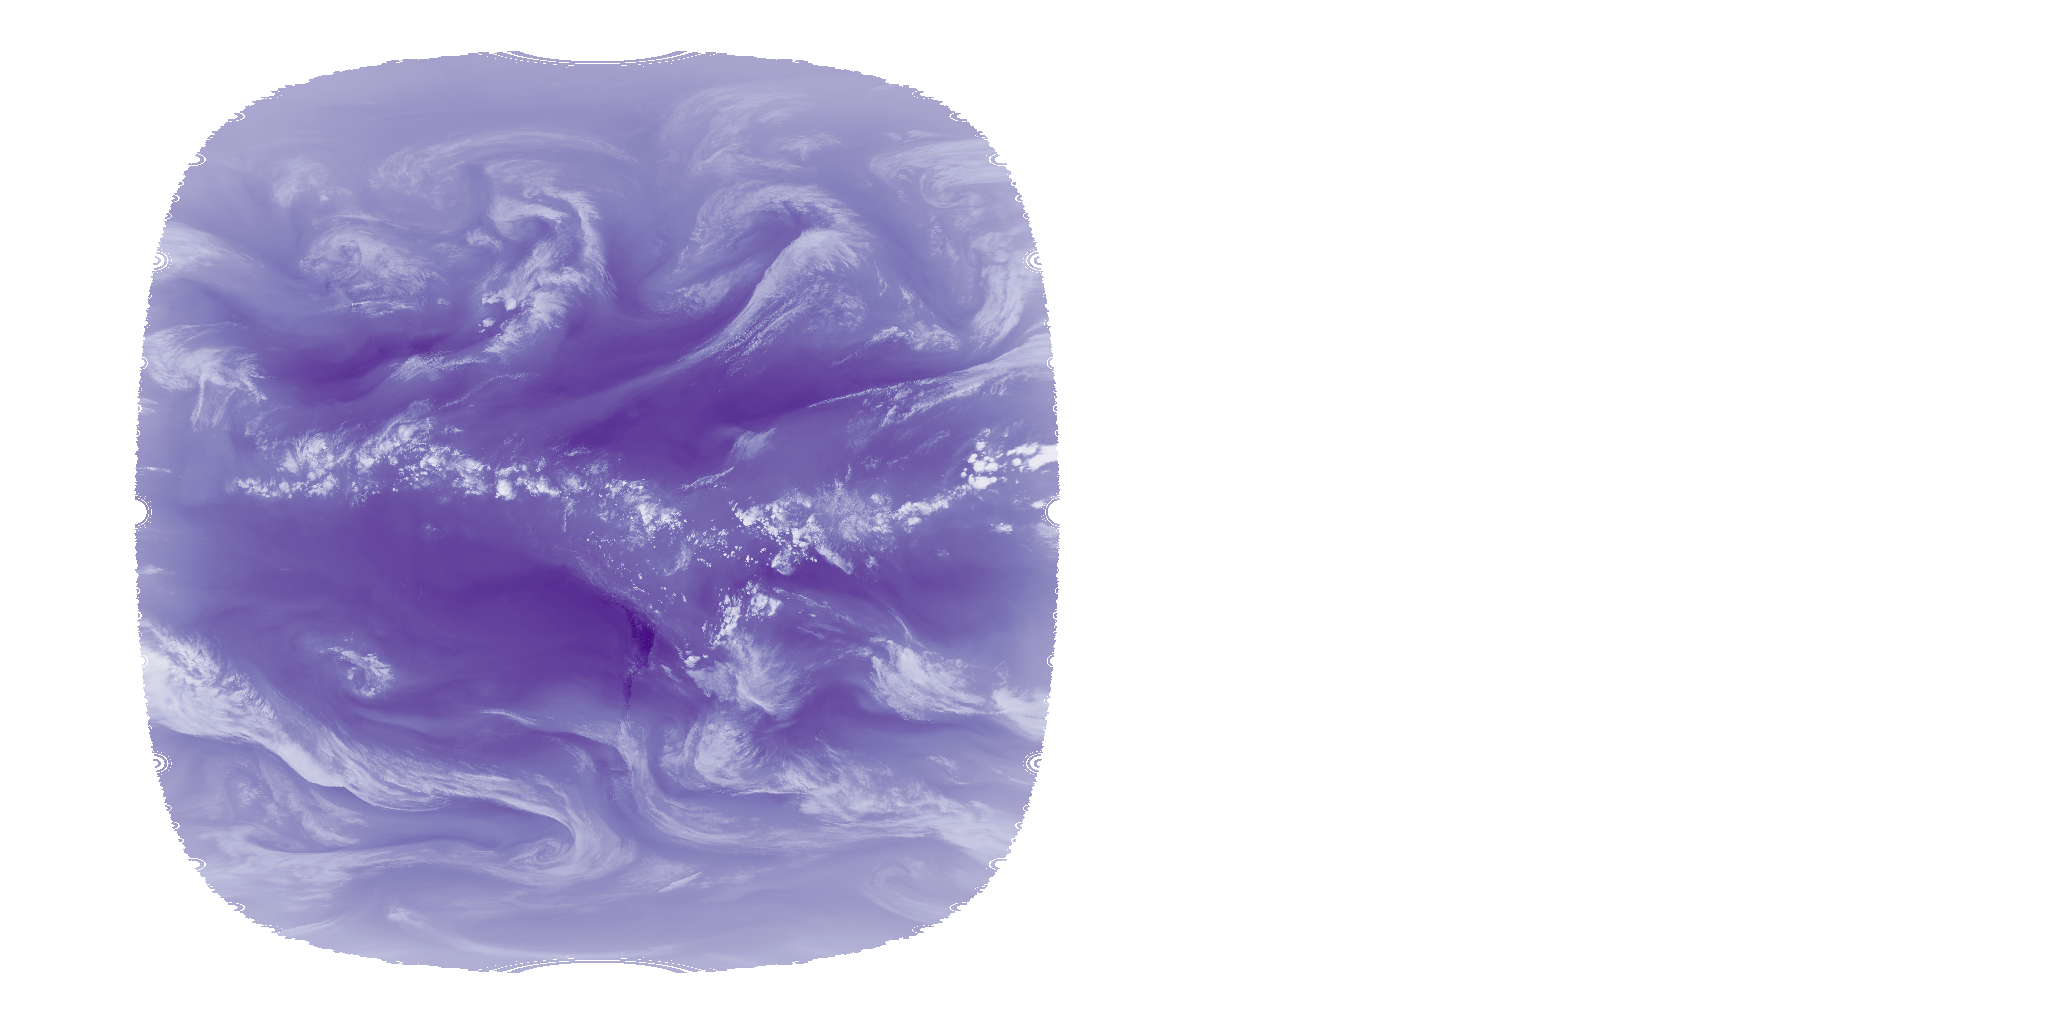

In [11]:
image

In [7]:
image.save("goes.png")

NameError: name 'image' is not defined

In [8]:
from PIL import Image
goes = Image.open("goes.png")

## GPM data

## Download L1C data

In [9]:
from gprof_nn.data.l1c import L1CFile
gpm_data = L1CFile("GPM/1C-R.GPM.GMI.XCAL2016-C.20220411-S143206-E160438.046124.V05A.HDF5").to_xarray_dataset()

In [10]:
lons = gpm_data.longitude.data
lats = gpm_data.latitude.data
lons_gpm_s = gpm_data.longitude.data
lats_gpm_s = gpm_data.latitude.data

In [11]:
tbs = gpm_data.brightness_temperatures

In [12]:
tbs.data

array([[[  157.31,    84.34,   176.3 , ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  157.82,    83.77,   175.54, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  158.36,    83.15,   174.98, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        ...,
        [  166.31,    97.34,   186.17, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  166.03,    97.52,   186.56, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  166.21,    97.22,   186.17, ..., -9999.9 , -9999.9 ,
         -9999.9 ]],

       [[  158.21,    84.51,   175.67, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  157.34,    84.03,   175.04, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  157.5 ,    84.47,   175.84, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        ...,
        [  166.21,    97.42,   186.35, ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  165.3 ,    96.85,   186.3 , ..., -9999.9 , -9999.9 ,
         -9999.9 ],
        [  165.28,    97.6 ,   185.61, ..., -999

In [13]:
from pyresample.geometry import SwathDefinition
from pyresample import kd_tree

swath = SwathDefinition(lons, lats)
tbs_r = kd_tree.resample_nearest(
    swath,
    tbs.data,
    area_def,
    radius_of_influence=50e3,
    fill_value=np.nan
)

In [14]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
norm = Normalize(100, 300)
m = ScalarMappable(norm, cmap="Oranges")
cs = m.to_rgba(tbs_r[:, :, 2])
gpm = Image.fromarray((cs * 255).astype(np.uint8))


In [15]:
from matplotlib.colors import Normalize
goes_norm = Normalize(200, 280)
plt.imshow(goes_ir["my_index-30b8e9e2eb7a375eac3aaea5813e762d"][2], norm=goes_norm, cmap="Purples")
plt.colorbar()

NameError: name 'goes_ir' is not defined

In [16]:
goes_ir = dataset

NameError: name 'dataset' is not defined

In [17]:
list(goes_ir.variables)

NameError: name 'goes_ir' is not defined

In [18]:
Image.fromarray

<function PIL.Image.fromarray(obj, mode=None)>

In [19]:
from matplotlib.cm import ScalarMappable
mappable = ScalarMappable(norm=goes_norm, cmap="Purples")

def make_texture(time):
    
    m = ScalarMappable(norm, cmap="Oranges")
    cs = m.to_rgba(tbs_r[:, :, 2])
    gpm = Image.fromarray((cs * 255).astype(np.uint8))
    
    goes = goes_ir.interp({"time": time})
    print(time, goes_ir.time)
    img = mappable.to_rgba(goes.data)
    img = Image.fromarray((img * 255).astype(np.uint8))
    background = Image.open("natural_earth.png").convert(mode="RGB")
    cmb = Image.alpha_composite(img, gpm)
    background.paste(cmb, (0, 0), cmb)
    return background
    
    
    

In [20]:
make_texture("2022-04-11T15:50")

NameError: name 'goes_ir' is not defined

In [21]:
background = Image.open("natural_earth.png").convert(mode="RGB")
cmb = Image.alpha_composite(gpm, gpm)
background.paste(cmb, (0, 0), cmb)

In [22]:
background.save("texture.png")

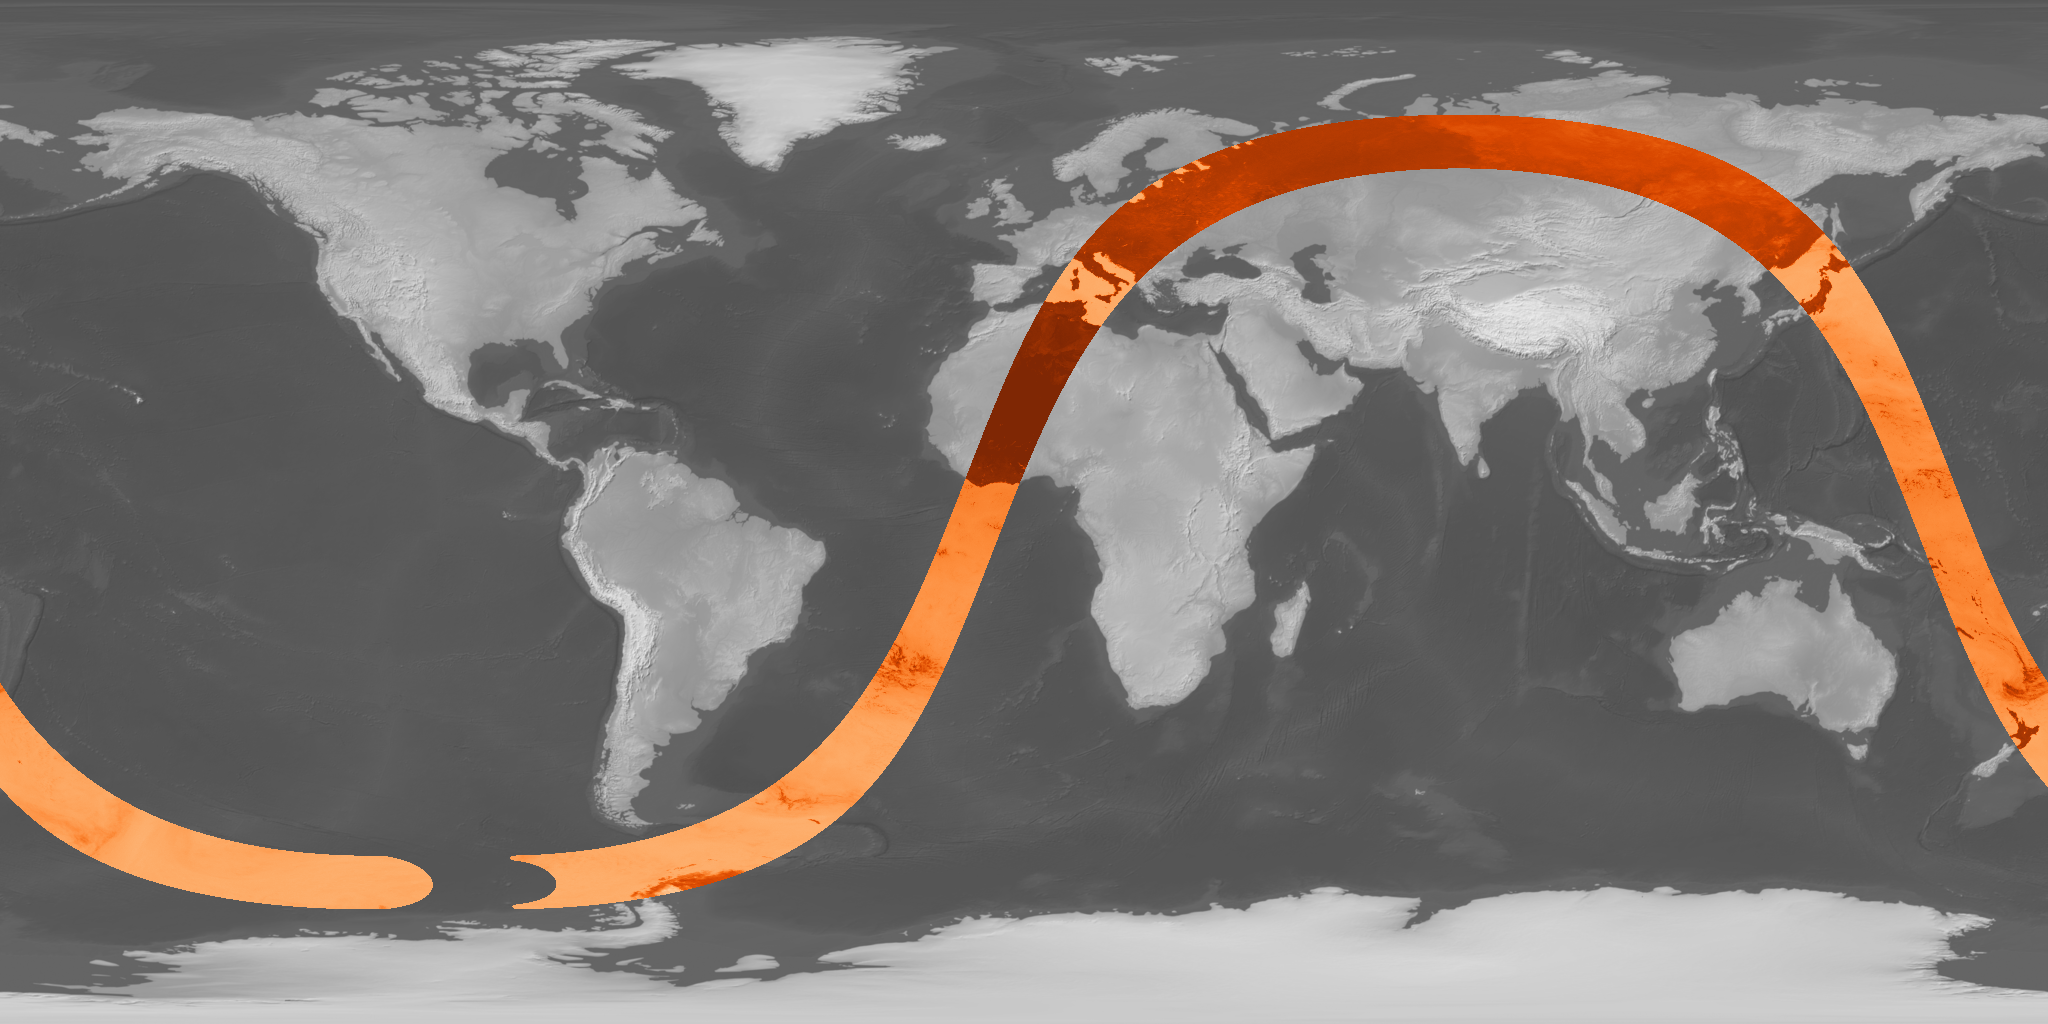

In [23]:
Image.open("texture.png")

## 3D Plot

In [173]:
import pyvista as pv
from pyvista import examples
pv.set_plot_theme("document")
color = "grey"
point_size = 10
line_width = 1

In [190]:
sphere = pv.Sphere(
    radius=1, theta_resolution=1024, phi_resolution=1024, start_theta=270.01, end_theta=270
)

In [30]:
from PIL import Image

In [163]:
R = 6378e3
goes_altitude = 35785e3
goes_lon = -75.2
goes_coords = np.array([[np.cos(np.deg2rad(goes_lon)), np.sin(np.deg2rad(goes_lon)), 0.0]]) * goes_altitude / R[]

In [178]:
gpm_alt = gpm_data.spacecraft_altitude.data
gpm_lat = gpm_data.latitude.data[:, 110]
gpm_lon = gpm_data.longitude.data[:, 110]

r_gpm = (R + gpm_alt * 1e3) / R
z = r_gpm * np.sin(np.deg2rad(gpm_lat))
cos_r = r_gpm * np.cos(np.deg2rad(gpm_lat))
gpm_coords = np.stack([
    cos_r * np.cos(np.deg2rad(gpm_lon)),
    cos_r * np.sin(np.deg2rad(gpm_lon)),
    z
], axis=-1)

In [203]:
goes = pv.PolyData(goes_coords)
goes["label"] = ["GOES 16"]
scene.add_point_labels(
    goes,
    "label",
    point_size=point_size,
    render_points_as_spheres=True,
    point_color=color,
    always_visible=True,
    shape_opacity=0.0,
    text_color="k",
    margin=20,
    font_size=30
)

<vtkmodules.vtkRenderingCore.vtkActor2D(0x563aa8735960) at 0x7f4b95a80b80>

In [204]:
goes_los_1 = np.concatenate([
    goes_coords,
    [[0, 0, 0.99]]
])
goes_los_2 = np.concatenate([
    goes_coords,
    [[0, 0, -0.99]]
])
scene.add_lines(goes_los_1, color=color, width=line_width)
scene.add_lines(goes_los_2, color=color, width=line_width)

<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x56376ab4f720) at 0x7f4b95a80dc0>

In [205]:
gpm_coords.shape

(2961, 3)

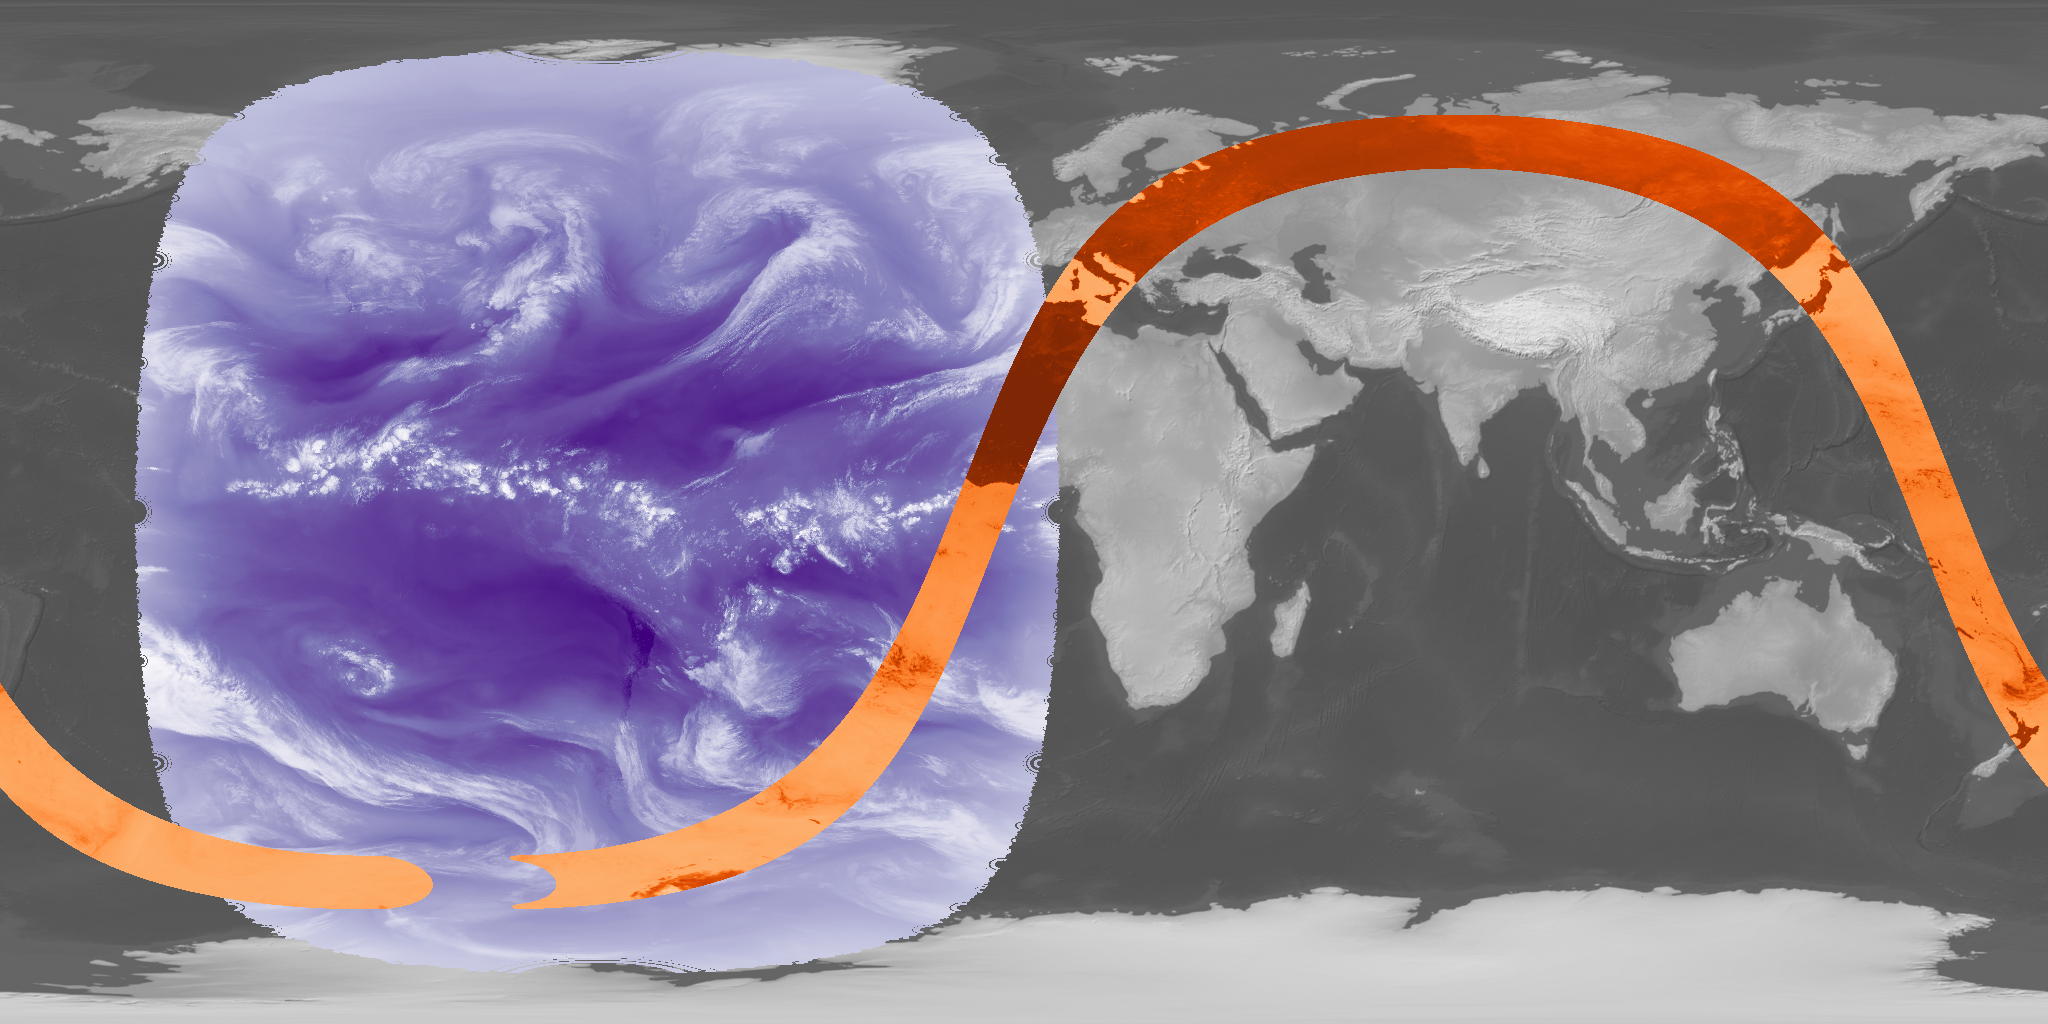

In [207]:
make_texture(gpm_data.scan_time[gpm_index])

In [237]:
rm -rf viewing_geometries

In [238]:
mkdir viewing_geometries

In [260]:
gpm_data

<xarray.Dataset>
Dimensions:                  (scans: 2961, pixels: 221, channels: 13)
Dimensions without coordinates: scans, pixels, channels
Data variables:
    latitude                 (scans, pixels) float32 -69.38 -69.37 ... -60.84
    longitude                (scans, pixels) float32 -88.65 -88.51 ... -113.3
    spacecraft_latitude      (scans) float32 -65.13 -65.13 ... -65.13 -65.13
    spacecraft_longitude     (scans) float32 -91.65 -91.37 ... -115.8 -115.5
    spacecraft_altitude      (scans) float32 416.2 416.2 416.2 ... 416.2 416.2
    brightness_temperatures  (scans, pixels, channels) float32 157.3 ... -1e+04
    scan_time                (scans) datetime64[ns] 2022-04-11T14:32:08.08000...
    incidence_angle          (scans, pixels) float32 52.91 52.91 ... 52.83 52.83
    sensor_orientation       (scans) int16 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

In [261]:
import pyvista as pv

for gpm_index in range(0, 2950, 10):
    pv.start_xvfb()
    scene = pv.Plotter(line_smoothing=True, point_smoothing=True, off_screen=True, window_size=(2048, 1024))

    #
    # Add GOES
    #

    goes = pv.PolyData(goes_coords)
    goes["label"] = ["GOES 16"]
    scene.add_point_labels(
        goes,
        "label",
        point_size=point_size,
        render_points_as_spheres=True,
        point_color=color,
        always_visible=True,
        shape_opacity=0.0,
        text_color="k",
        margin=20,
        font_size=30
    )

    goes_los_1 = np.concatenate([
        goes_coords,
        [[0, 0, 0.99]]
    ])
    goes_los_2 = np.concatenate([
        goes_coords,
        [[0, 0, -0.99]]
    ])
    scene.add_lines(goes_los_1, color=color, width=line_width)
    scene.add_lines(goes_los_2, color=color, width=line_width)

    #
    # Add GPM
    #

    gpm = pv.PolyData(gpm_coords[[gpm_index]])
    gpm["label"] = ["GPM"]
    scene.add_point_labels(
        gpm,
        "label",
        point_size=point_size,
        render_points_as_spheres=True,
        point_color=color,
        always_visible=True,
        shape_opacity=0.0,
        text_color="k",
        margin=10,
        font_size=30
    )

    x_gpm = np.cos(np.deg2rad(lats_gpm_s[gpm_index, :])) * np.cos(np.deg2rad(lons_gpm_s[gpm_index, :]))
    y_gpm = np.cos(np.deg2rad(lats_gpm_s[gpm_index, :])) * np.sin(np.deg2rad(lons_gpm_s[gpm_index, :]))
    z_gpm = np.sin(np.deg2rad(lats_gpm_s[gpm_index, :]))
    gpm_swath = np.stack([x_gpm, y_gpm, z_gpm], axis=-1)

    x_gpm = (1 + gpm_alt[gpm_index] * 1e3 / R) * np.cos(np.deg2rad(gpm_lat[gpm_index])) * np.cos(np.deg2rad(gpm_lon[gpm_index]))
    y_gpm = (1 + gpm_alt[gpm_index] * 1e3 / R) * np.cos(np.deg2rad(gpm_lat[gpm_index])) * np.sin(np.deg2rad(gpm_lon[gpm_index]))
    z_gpm = (1 + gpm_alt[gpm_index] * 1e3 / R) * np.sin(np.deg2rad(gpm_lat[gpm_index]))

    n_tris = 20
    pixels = gpm_swath.shape[0]
    indices = list(range(0, pixels, pixels // n_tris)) + [-1]
    points = [gpm_swath[i] for i in indices]
    points.append([x_gpm, y_gpm, z_gpm])
    faces = []
    for i in range(len(indices) - 1):
        faces += [3, i, i + 1, len(points) - 1]
    view = pv.PolyData(
        var_inp=points,
        faces=faces
    )
    scene.add_mesh(view, color="FFFFFF", opacity=0.8)

    sphere.active_t_coords = np.zeros((sphere.points.shape[0], 2))

    # Populate by manually calculating
    sphere.active_t_coords[:, 0] = 0.75 + np.arctan2(-sphere.points[:, 0], sphere.points[:, 1]) / (2 * np.pi)
    coords = sphere.active_t_coords[:, 0]
    coords[coords < 0] += 1.0
    coords[coords > 1] -= 1.0
    sphere.active_t_coords[:, 1] = 0.5 + np.arcsin(sphere.points[:, 2]) / np.pi

    # And let's display it with a world map
    array = np.array(make_texture(gpm_data.scan_time[gpm_index]))
    array = array.reshape(array.shape, order="F")
    tex = pv.numpy_to_texture(array)
    #tex = pv.read_texture("texture.png")
    scene.add_mesh(sphere, texture=tex)
    #warp.plot(texture=tex, jupyter_backend="pythreejs")

    cpos = (7.656091757265272, 0.13200056862814558, 0.19335131768785568)
    #scene.show(screenshot="viewing_geometries/{gpm_index}.png", window_size=(4096, 2048), cpos=cpos)
    scene.camera.position = cpos
    scene.screenshot(f"viewing_geometries/{gpm_index:04}.png")
    scene.close()
    
    del scene

<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:32:08.080000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:09.538 (62724.248s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a072ce0a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:32:26.830000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:13.759 (62728.469s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07316fa0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:32:45.580000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:17.909 (62732.619s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a13edead0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:33:04.330000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:22.036 (62736.746s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a13fd0a40): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:33:23.080000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:26.160 (62740.870s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07247b00): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:33:41.830000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:30.283 (62744.993s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07420460): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:34:00.580000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:34.412 (62749.122s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a071e3e10): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:34:19.330000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:38.540 (62753.250s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x7f46bb03abb0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:34:38.080000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:42.670 (62757.380s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07247b00): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:34:56.830000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:46.786 (62761.496s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x7f46bb03abb0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:35:15.580000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:50.905 (62765.615s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0738c0a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:35:34.330000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:55.027 (62769.737s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a42b641b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:35:53.080000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:48:59.157 (62773.867s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a1408f020): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:36:11.830000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:03.280 (62777.990s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07322910): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:36:30.580000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:07.419 (62782.129s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07316fa0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:36:49.330000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:11.538 (62786.248s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a13fd0a40): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:37:08.080000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:15.664 (62790.373s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0743d3d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:37:26.831000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:19.790 (62794.499s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0730fb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:37:45.581000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:23.911 (62798.620s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07316fa0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:38:04.331000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:28.027 (62802.737s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0747c9e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:38:23.081000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:32.180 (62806.890s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07519d10): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:38:41.831000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:36.299 (62811.009s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0738bcf0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:39:00.581000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:40.419 (62815.129s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0730fb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:39:19.331000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:44.543 (62819.253s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0747c9e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:39:38.081000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:48.668 (62823.378s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0730fb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:39:56.831000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:52.810 (62827.519s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a072ed2a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:40:15.581000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:49:56.963 (62831.673s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x7f46bb03abb0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:40:34.331000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:01.087 (62835.797s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073b4340): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:40:53.081000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:05.209 (62839.918s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0e7c2c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:41:11.831000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:09.324 (62844.034s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0753e7d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:41:30.581000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:13.445 (62848.155s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f16720): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:41:49.331000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:17.575 (62852.285s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0753df30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:42:08.081000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:21.698 (62856.408s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073b4340): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:42:26.831000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:25.819 (62860.529s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0753e7d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:42:45.582000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:29.945 (62864.654s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07316fa0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:43:04.332000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:34.069 (62868.778s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07519d10): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:43:23.082000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:38.202 (62872.912s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0ead1a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:43:41.832000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:42.356 (62877.065s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f5a980): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:44:00.582000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:46.513 (62881.222s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0e983f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:44:19.332000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:50.650 (62885.360s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f5a980): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:44:38.082000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:54.805 (62889.515s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07345520): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:44:56.832000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:50:58.932 (62893.642s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0fcc390): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:45:15.582000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:03.057 (62897.766s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073cf270): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:45:34.332000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:07.173 (62901.882s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f5a980): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:45:53.082000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:11.289 (62905.999s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0751cb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:46:11.832000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:15.417 (62910.127s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07549a90): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:46:30.582000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:19.549 (62914.259s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073cf270): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:46:49.332000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:23.670 (62918.379s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0fa9310): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:47:08.082000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:27.818 (62922.528s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0751cb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:47:26.832000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:31.979 (62926.689s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0fa9310): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:47:45.583000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:36.127 (62930.837s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a13fd0a40): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:48:04.333000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:40.276 (62934.986s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a071bdcd0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:48:23.083000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:44.409 (62939.118s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0fa9310): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:48:41.833000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:48.536 (62943.246s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0742e620): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:49:00.583000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:52.658 (62947.368s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0ead1a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:49:19.333000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:51:56.788 (62951.498s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0e983f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:49:38.083000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:00.925 (62955.634s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073cf270): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:49:56.833000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:05.054 (62959.763s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0eb1e70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:50:15.583000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:09.186 (62963.895s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0744c000): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:50:34.333000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:13.337 (62968.047s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f6da70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:50:53.083000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:17.506 (62972.216s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f0ceb0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:51:11.833000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:21.677 (62976.386s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0eb1e70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:51:30.583000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:25.818 (62980.527s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f6da70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:51:49.333000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:29.949 (62984.659s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f5a980): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:52:08.084000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:34.073 (62988.783s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f389e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:52:26.834000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:38.208 (62992.918s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e105d4f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:52:45.584000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:42.334 (62997.043s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f6da70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:53:04.334000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:46.471 (63001.181s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b8330): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:53:23.084000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:50.604 (63005.313s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e1013050): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:53:41.834000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:54.726 (63009.436s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b8330): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:54:00.584000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:52:58.871 (63013.581s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10e7480): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:54:19.334000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:03.006 (63017.716s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0fdd400): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:54:38.084000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:07.139 (63021.849s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b8330): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:54:56.834000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:11.265 (63025.975s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f389e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:55:15.585000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:15.395 (63030.105s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073cf270): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:55:34.335000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:19.523 (63034.233s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11fec70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:55:53.085000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:23.654 (63038.363s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a073cf270): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:56:11.835000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:27.776 (63042.486s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e105c480): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:56:30.585000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:31.900 (63046.610s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f83270): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:56:49.335000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:36.029 (63050.738s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e105c480): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:57:08.085000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:40.156 (63054.866s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e1028d60): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:57:26.835000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:44.313 (63059.023s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11c2ba0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:57:45.585000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:48.467 (63063.177s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11dd8d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:58:04.335000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:52.587 (63067.296s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e105c480): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:58:23.085000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:53:56.712 (63071.422s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0730fb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:58:41.835000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:00.833 (63075.543s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e1167bc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:59:00.585000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:04.968 (63079.678s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11dd8d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:59:19.335000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:09.096 (63083.806s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:59:38.085000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:13.230 (63087.939s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0730fb30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T14:59:56.835000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:17.355 (63092.065s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fe9b370): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:00:15.585000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:21.479 (63096.189s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e12343c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:00:34.335000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:25.605 (63100.315s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e1172fb0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:00:53.085000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:29.756 (63104.466s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e121b620): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:01:11.835000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:33.909 (63108.619s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ff3a840): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:01:30.585000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:38.062 (63112.772s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9feee7e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:01:49.335000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:42.186 (63116.895s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fe3d7f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:02:08.085000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:46.320 (63121.029s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e119fe50): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:02:26.835000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:50.444 (63125.154s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:02:45.586000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:54.578 (63129.288s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b25b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:03:04.336000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:54:58.699 (63133.409s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:03:23.086000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:02.830 (63137.540s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11ae5b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:03:41.836000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:06.953 (63141.663s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9febd550): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:04:00.586000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:11.083 (63145.792s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:04:19.336000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:15.229 (63149.939s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a074fc2d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:04:38.086000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:19.384 (63154.094s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:04:56.836000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:23.533 (63158.243s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0e9a5e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:05:15.586000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:27.660 (63162.369s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e12343c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:05:34.336000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:31.787 (63166.496s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fefd5e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:05:53.086000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:35.915 (63170.624s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a074ac910): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:06:11.837000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:40.041 (63174.751s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fefd5e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:06:30.587000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:44.168 (63178.878s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a074a8740): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:06:49.337000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:48.290 (63182.999s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0fdc760): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:07:08.087000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:52.423 (63187.133s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffa78e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:07:26.837000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:55:56.548 (63191.258s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffe9530): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:07:45.587000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:00.703 (63195.413s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e119fe50): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:08:04.337000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:04.876 (63199.586s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ff22cd0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:08:23.087000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:09.012 (63203.721s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e119fe50): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:08:41.837000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:13.140 (63207.850s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ff85f40): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:09:00.587000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:17.263 (63211.972s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b25b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:09:19.337000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:21.382 (63216.091s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa0054f90): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:09:38.087000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:25.504 (63220.213s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffded30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:09:56.837000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:29.633 (63224.343s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fe4b290): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:10:15.588000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:33.757 (63228.467s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa0054f90): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:10:34.338000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:37.874 (63232.584s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a074b0c60): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:10:53.088000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:41.990 (63236.699s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:11:11.838000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:46.131 (63240.841s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa00de610): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:11:30.588000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:50.257 (63244.967s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa0054f90): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:11:49.338000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:54.383 (63249.093s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:12:08.088000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:56:58.518 (63253.228s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01e2a00): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:12:26.838000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:02.641 (63257.351s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fe45950): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:12:45.588000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:06.767 (63261.477s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea619f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:13:04.338000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:10.896 (63265.606s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e0f2f450): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:13:23.088000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:15.024 (63269.733s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a0748ff30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:13:41.838000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:19.145 (63273.855s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa0143c10): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:14:00.588000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:23.266 (63277.976s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b25b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:14:19.338000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:27.392 (63282.102s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01d25a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:14:38.088000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:31.556 (63286.266s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b25b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:14:56.838000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:35.711 (63290.421s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffded30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:15:15.588000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:39.868 (63294.578s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a074b0c60): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:15:34.339000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:44.013 (63298.723s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffded30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:15:53.089000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:48.139 (63302.849s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea40a30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:16:11.839000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:52.261 (63306.971s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01ba210): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:16:30.589000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:57:56.389 (63311.098s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa0110840): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:16:49.339000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:00.518 (63315.228s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffded30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:17:08.089000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:04.637 (63319.347s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea73400): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:17:26.839000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:08.759 (63323.469s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa00998d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:17:45.589000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:12.884 (63327.594s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ff22cd0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:18:04.339000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:17.039 (63331.749s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea73400): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:18:23.089000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:21.196 (63335.906s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a07495b40): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:18:41.839000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:25.341 (63340.050s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea73400): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:19:00.589000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:29.491 (63344.201s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feae3c10): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:19:19.339000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:33.622 (63348.331s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9fff5730): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:19:38.089000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:37.748 (63352.458s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01219b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:19:56.840000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:41.874 (63356.583s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11a6900): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:20:15.589000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:45.994 (63360.704s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b25b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:20:34.340000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:50.125 (63364.835s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb98780): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:20:53.090000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:54.256 (63368.965s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10b25b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:21:11.840000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:58:58.382 (63373.092s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaba5b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:21:30.590000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:02.534 (63377.244s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffcc090): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:21:49.340000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:06.678 (63381.388s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec1f110): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:22:08.090000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:10.829 (63385.538s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaa89b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:22:26.840000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:14.981 (63389.691s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01c56f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:22:45.590000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:19.115 (63393.825s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec1f110): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:23:04.340000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:23.247 (63397.956s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa0110840): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:23:23.090000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:27.365 (63402.074s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a317c1e00): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:23:41.840000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:31.482 (63406.192s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01accb0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:24:00.590000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:35.616 (63410.325s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec1f110): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:24:19.341000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:39.744 (63414.454s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11f0c30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:24:38.090000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:43.871 (63418.581s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a317c1e00): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:24:56.840000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:48.030 (63422.740s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb307f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:25:15.591000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:52.182 (63426.892s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea08b30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:25:34.341000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 11:59:56.322 (63431.032s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fecdee60): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:25:53.091000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:00.491 (63435.201s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e11f0c30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:26:11.841000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:04.622 (63439.332s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb307f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:26:30.591000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:08.743 (63443.453s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffcc090): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:26:49.341000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:12.884 (63447.593s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaa89b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:27:08.091000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:17.028 (63451.738s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaba5b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:27:26.841000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:21.170 (63455.880s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffcc090): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:27:45.591000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:25.293 (63460.003s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:28:04.341000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:29.430 (63464.140s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feca38e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:28:23.091000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:33.576 (63468.286s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed1a1d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:28:41.841000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:37.716 (63472.426s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bab61e10): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:29:00.591000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:41.845 (63476.555s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb98780): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:29:19.341000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:45.976 (63480.686s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feca38e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:29:38.092000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:50.112 (63484.821s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb98780): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:29:56.842000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:54.239 (63488.949s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563aa01ac010): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:30:15.592000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:00:58.381 (63493.090s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb8c030): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:30:34.342000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:02.510 (63497.220s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb98780): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:30:53.092000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:06.642 (63501.351s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639babfdd20): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:31:11.842000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:10.770 (63505.480s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece0310): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:31:30.592000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:14.897 (63509.606s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feda3620): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:31:49.342000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:19.041 (63513.750s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb98780): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:32:08.092000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:23.181 (63517.891s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed86e50): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:32:26.842000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:27.310 (63522.020s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea0f120): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:32:45.592000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:31.439 (63526.149s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaba5b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:33:04.342000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:35.566 (63530.276s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:33:23.092000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:39.702 (63534.411s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaa89b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:33:41.842000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:43.837 (63538.546s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec6e690): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:34:00.592000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:47.966 (63542.675s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec895e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:34:19.343000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:52.095 (63546.805s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639babc4ad0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:34:38.092000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:01:56.235 (63550.944s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bab79ed0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:34:56.843000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:00.413 (63555.123s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feaba5b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:35:15.593000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:04.568 (63559.278s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb9bfc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:35:34.343000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:08.733 (63563.442s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639babc4ad0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:35:53.093000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:12.870 (63567.579s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bace7230): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:36:11.843000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:17.005 (63571.714s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a9ffa1730): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:36:30.593000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:21.138 (63575.848s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed29ef0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:36:49.343000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:25.268 (63579.978s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bace7230): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:37:08.093000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:29.401 (63584.111s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad80b40): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:37:26.843000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:33.530 (63588.240s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639babe1220): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:37:45.593000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:37.657 (63592.366s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fea0a7d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:38:04.343000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:41.788 (63596.498s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639baca2660): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:38:23.093000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:45.928 (63600.638s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bab81000): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:38:41.843000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:50.095 (63604.805s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad35010): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:39:00.593000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:54.243 (63608.953s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:39:19.343000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:02:58.398 (63613.108s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec895e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:39:38.094000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:02.531 (63617.240s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:39:56.844000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:06.665 (63621.374s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacf14c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:40:15.594000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:10.799 (63625.509s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bac2b370): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:40:34.344000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:14.931 (63629.640s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb9bfc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:40:53.094000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:19.064 (63633.774s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bac28fc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:41:11.844000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:23.201 (63637.910s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacf14c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:41:30.594000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:27.334 (63642.043s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb9bfc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:41:49.344000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:31.469 (63646.179s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed84380): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:42:08.094000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:35.605 (63650.315s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad8ca20): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:42:26.844000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:39.764 (63654.474s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639c35a61e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:42:45.594000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:43.922 (63658.631s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb9bfc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:43:04.344000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:48.096 (63662.806s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad8ca20): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:43:23.094000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:52.233 (63666.943s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacecd20): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:43:41.844000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:03:56.368 (63671.078s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10f44f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:44:00.595000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:00.498 (63675.208s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacb2d70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:44:19.345000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:04.630 (63679.339s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb13b60): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:44:38.095000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:08.763 (63683.473s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad389e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:44:56.845000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:12.890 (63687.600s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639c35ea720): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:45:15.595000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:17.013 (63691.722s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:45:34.345000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:21.141 (63695.850s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bac2b370): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:45:53.095000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:25.268 (63699.978s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacb2d70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:46:11.845000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:29.396 (63704.106s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639e10f44f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:46:30.595000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:33.522 (63708.231s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bac28fc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:46:49.345000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:37.653 (63712.362s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed951a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:47:08.095000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:41.784 (63716.494s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad45460): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:47:26.845000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:45.919 (63720.629s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad92910): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:47:45.595000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:50.051 (63724.761s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639c35a61e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:48:04.345000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:54.180 (63728.889s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed951a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:48:23.095000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:04:58.299 (63733.009s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2917a060): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:48:41.845000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:02.418 (63737.128s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2913a220): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:49:00.595000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:06.559 (63741.268s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639c35a61e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:49:19.345000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:10.677 (63745.387s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:49:38.096000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:14.801 (63749.510s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a291f9890): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:49:56.846000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:18.958 (63753.667s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a291fc8b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:50:15.596000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:23.115 (63757.825s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29117470): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:50:34.346000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:27.269 (63761.979s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fece5ee0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:50:53.096000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:31.426 (63766.136s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a291fc8b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:51:11.846000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:35.571 (63770.280s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2917a060): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:51:30.596000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:39.693 (63774.402s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacb2d70): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:51:49.346000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:43.813 (63778.522s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bac28fc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:52:08.096000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:47.941 (63782.651s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fed951a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:52:26.846000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:52.065 (63786.775s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad8e2e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:52:45.596000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:05:56.188 (63790.898s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacf14c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:53:04.346000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:00.325 (63795.035s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad4d8f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:53:23.096000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:04.479 (63799.189s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec4c7b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:53:41.846000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:08.609 (63803.319s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639feb347a0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:54:00.596000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:12.741 (63807.450s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad4d8f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:54:19.346000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:16.871 (63811.580s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639c36120d0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:54:38.096000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:20.995 (63815.705s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad4d8f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:54:56.846000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:25.137 (63819.847s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a292e0ae0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:55:15.596000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:29.269 (63823.979s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec895e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:55:34.346000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:33.402 (63828.112s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad4d8f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:55:53.096000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:37.532 (63832.241s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2924c570): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:56:11.847000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:41.647 (63836.357s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2927e3c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:56:30.597000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:45.783 (63840.493s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29101840): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:56:49.347000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:49.947 (63844.656s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad4d8f0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:57:08.097000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:54.108 (63848.818s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bad8ca20): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:57:26.847000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:06:58.260 (63852.970s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2927e3c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:57:45.597000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:02.395 (63857.104s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bacf14c0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:58:04.347000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:06.525 (63861.234s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec4c7b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:58:23.097000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:10.663 (63865.372s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a292b9640): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:58:41.847000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:14.795 (63869.505s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29130af0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:59:00.597000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:18.918 (63873.628s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a291a38e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:59:19.347000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:23.042 (63877.751s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29130af0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:59:38.097000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:27.170 (63881.880s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639fec895e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T15:59:56.847000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:31.299 (63886.009s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639c36e2520): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:00:15.597000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:35.473 (63890.183s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29130af0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:00:34.347000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:39.622 (63894.332s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a292c5770): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:00:53.097000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:43.745 (63898.454s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639bac28fc0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:01:11.847000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:47.872 (63902.582s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a293fd5e0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:01:30.597000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:52.003 (63906.712s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29130af0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:01:49.347000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:07:56.130 (63910.839s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a29320800): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:02:08.097000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:00.257 (63914.967s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639dcabd760): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:02:26.847000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:04.374 (63919.084s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2946e590): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:02:45.598000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:08.498 (63923.207s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a293cde30): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:03:04.348000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:12.637 (63927.347s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a293a78b0): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:03:23.098000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:16.762 (63931.472s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a2946e590): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:03:41.848000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:20.914 (63935.624s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x5639dcaf1f50): Unable to eglMakeCurrent: 12291


<xarray.DataArray 'scan_time' ()>
array('2022-04-11T16:04:00.598000000', dtype='datetime64[ns]') <xarray.DataArray 'time' (time: 11)>
array(['2022-04-11T14:30:20.000000000', '2022-04-11T14:40:20.000000000',
       '2022-04-11T14:50:20.000000000', '2022-04-11T15:00:20.000000000',
       '2022-04-11T15:10:20.000000000', '2022-04-11T15:20:20.000000000',
       '2022-04-11T15:30:20.000000000', '2022-04-11T15:40:20.000000000',
       '2022-04-11T15:50:20.000000000', '2022-04-11T16:00:20.000000000',
       '2022-04-11T17:50:20.000000000'], dtype='datetime64[ns]')
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown ba...
  * time     (time) datetime64[ns] 2022-04-11T14:30:20 ... 2022-04-11T17:50:20


2022-05-16 12:08:25.067 (63939.777s) [        59585080] vtkEGLRenderWindow.cxx:587   WARN| vtkEGLRenderWindow (0x563a292b9640): Unable to eglMakeCurrent: 12291


In [257]:
goes_ir.data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [191]:
# Initialize the texture coordinates array


<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x563ace3e7c40) at 0x7f47e3aea020>

In [201]:
scene.close()

In [193]:
scene.show(screenshot="viewing_geometries.png", window_size=(2048, 1024), jupyter_backend="pythreejs", return_viewer=True)

/home/simonpf/miniconda3/envs/thesis/lib/python3.10/site-packages/pyvista/jupyter/pv_pythreejs.py:447: UserWarning: Empty or unsupported dataset attached to actor
  warnings.warn('Empty or unsupported dataset attached to actor')
/home/simonpf/miniconda3/envs/thesis/lib/python3.10/site-packages/pyvista/jupyter/pv_pythreejs.py:447: UserWarning: Empty or unsupported dataset attached to actor
  warnings.warn('Empty or unsupported dataset attached to actor')


In [194]:
v

Renderer(camera=PerspectiveCamera(aspect=2.0, children=(DirectionalLight(color='#fefefe', intensity=0.25, matr…

In [200]:
v.camera.position

(15.17099621846343, 4.780577658090442, 0.3942927698064358)

In [157]:
Image.fromarray(scene.image).save("viewing_geometries.png")

AttributeError: 
This plotter has not yet been setup and rendered with ``show()``.
Consider setting ``off_screen=True`` for off screen rendering.


In [117]:
scene.screenshot("viewing_geometries.png", window_size=(2000, 2000))

AttributeError: 'Plotter' object has no attribute 'ren_win'

## GPM constellation

In [24]:
from gprof_nn.data.l1c import L1CFile
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from pyresample.geometry import SwathDefinition
from pyresample import kd_tree

R = 6371e3


class GPMSatellite:
    def __init__(self, files, channel=0, group="S1", name=None):
        data = []
        for filename in files:
            data.append(L1CFile(filename).to_xarray_dataset())
        self.data = xr.concat(data, dim="scans")
        self.name = name
        self.channel = channel
        
    def get_data(self, time, duration=30):
        scan_time = self.data.scan_time.data
        end_time = time
        start_time = time - np.timedelta64(duration, "m")
        indices = (scan_time >= start_time) * (scan_time <= end_time)
        return self.data[{"scans": indices}]

    def get_image(self, area, time, duration=30, cmap="Oranges", fade=True):
        
        if isinstance(time, float):
            index = int(time * self.data.scans.size)
            time = self.data.scan_time[index].data
        
        norm = Normalize(100, 300)
        m = ScalarMappable(norm, cmap=cmap)
        
        data = self.get_data(time, duration=duration)
        if data.scans.size == 0:
            return None
        
        tbs = data.brightness_temperatures[{"channels": self.channel}]
        lons = data.longitude.data
        lats = data.latitude.data
        swath = SwathDefinition(lons, lats)
        tbs, scan_time = xr.broadcast(tbs, data.scan_time)
        
        
        start_time = time - np.timedelta64(duration, "m")
        dt = (scan_time.data - start_time).astype("timedelta64[s]")
        
        tbs_r = kd_tree.resample_nearest(
            swath,
            tbs.data,
            area,
            radius_of_influence=50e3,
            fill_value=np.nan
        )
        cs = m.to_rgba(tbs_r)
        
        dt_r = kd_tree.resample_nearest(
            swath,
            dt.astype(np.float32),
            area,
            radius_of_influence=50e3,
            fill_value=np.nan
        )
        dt_r = np.minimum(dt_r, 60 * 10) / 600
        if fade:
            cs[..., -1] *= dt_r
        
        img = Image.fromarray((cs * 255).astype(np.uint8))
        
        return img
    
    def get_time(self, location):
        n_scans = self.data.scans.size
        index = int(location * n_scans)
        index = min(index, n_scans - 1)
        return self.data.scan_time[index].data
    
    def add_satellite(
        self,
        time,
        scene, 
        color="black",
        line_width=1,
        point_size=4,
        fov=True
    ):
        scan_time = self.data.scan_time.data
        if isinstance(time, float):
            index = int(time * scan_time.size)
        else:
            index = np.argmin(np.abs(scan_time - time))
        
        lat = self.data.spacecraft_latitude.data[index]
        lon = self.data.spacecraft_longitude.data[index]
        alt = self.data.spacecraft_altitude.data[index] * 1e3
        x_sc = (alt + R) / R * np.cos(np.deg2rad(lat)) * np.cos(np.deg2rad(lon))
        y_sc = (alt + R) / R * np.cos(np.deg2rad(lat)) * np.sin(np.deg2rad(lon))
        z_sc = (alt + R) / R * np.sin(np.deg2rad(lat))
        
        lons = self.data.longitude.data[index, :]
        lats = self.data.latitude.data[index, :]
        
        x_swath = np.cos(np.deg2rad(lats)) * np.cos(np.deg2rad(lons))
        y_swath = np.cos(np.deg2rad(lats)) * np.sin(np.deg2rad(lons))
        z_swath = np.sin(np.deg2rad(lats))
        
        #gpm_los_1 = np.concatenate([
        #    [x_sc, y_sc, z_sc],
        #    [x_swath[0], y_swath[0], z_swath[0]]
        #])
        #gpm_los_2 = np.concatenate([
        #    [x_sc, y_sc, z_sc],
        #    [x_swath[1], y_swath[1], z_swath[1]]
        #])
        #scene.add_lines(gpm_los_1, color=color, width=line_width)
        #scene.add_lines(gpm_los_2, color=color, width=line_width)
        n_tris = 10
        pixels = x_swath.shape[0]
        indices = list(range(0, pixels, pixels // n_tris)) + [-1]
        
        points = [[x_swath[i], y_swath[i], z_swath[i]] for i in indices]
        points.append([x_sc, y_sc, z_sc])
        faces = []
        for i in range(len(indices) - 1):
            faces += [3, i, i + 1, len(points) - 1]
        view = pv.PolyData(
            var_inp=points,
            faces=faces
        )
        #view = pv.Triangle([
        #    [x_sc, y_sc, z_sc],
        #    [x_swath[0], y_swath[0], z_swath[0]],
        #    [x_swath[-1], y_swath[-1], z_swath[-1]],
        #])
        gpm = pv.PolyData([[x_sc, y_sc, z_sc]])
        if self.name is not None:
            gpm["label"] = [self.name]
            scene.add_point_labels(
                gpm,
                "label",
                point_size=point_size,
                render_points_as_spheres=True,
                text_color="black",
                point_color=color,
                shape_opacity=0.0,
                always_visible=False
            )
        else:
            scene.add_points(
                gpm,
                point_size=point_size,
                render_points_as_spheres=True,
                color=color
            )
            
        
        if fov:
            scene.add_mesh(view, color="#AAAAAA", opacity=0.5)


In [25]:
from datetime import datetime
from pansat.products.satellite.gpm import (
    l1c_noaa20, l1c_noaa19, l1c_metopb_mhs,
    l1c_metopc, l1c_f15, l1c_f16, l1c_f17, l1c_f18,
    l1c_gcomw1, l1c_snpp
    
)
start_time = datetime(2020, 4, 18, 23)
end_time = datetime(2020, 4, 19, 0)

#l1c_f15.download(start_time, end_time, destination="f15")
#l1c_snpp.download(start_time, end_time, destination="snpp")
#l1c_f17.download(start_time, end_time, destination="f17")
#l1c_f18.download(start_time, end_time, destination="f18")
#l1c_metopb_mhs.download(start_time, end_time, destination="metop_b")
#l1c_metopc.download(start_time, end_time, destination="metop_c")
#files = l1c_noaa20.download(start_time, end_time, destination="noaa_20")
#files = l1c_noaa19.download(start_time, end_time, destination="noaa_19")
#files = l1c_gpm_gmi_r.download(start_time, end_time, destination="gmi")

In [26]:
from pathlib import Path
# SSMI/S use last channel ~89 GHz
f16 = GPMSatellite(sorted(list(Path("f16").glob("*.HDF5"))), name="F16", channel=-2)
f17 = GPMSatellite(sorted(list(Path("f17").glob("*.HDF5"))), name="F17", channel=-2)
f18 = GPMSatellite(sorted(list(Path("f18").glob("*.HDF5"))), name="F18", channel=-2)

In [27]:
# MHS, First channel
noaa_19 = GPMSatellite(sorted(list(Path("noaa_19").glob("*.HDF5"))), name="NOAA 19", channel=0)
metop_b = GPMSatellite(sorted(list(Path("metop_b/").glob("*.HDF5"))), name="MetOp B", channel=0)
metop_c = GPMSatellite(sorted(list(Path("metop_c/").glob("*.HDF5"))), name="MetOp C", channel=0)

In [28]:
# ATMS
snpp = GPMSatellite(sorted(list(Path("snpp/").glob("*.HDF5"))), name="SUOMI NPP", channel=2)
noaa_20 = GPMSatellite(sorted(list(Path("noaa_20").glob("*.HDF5"))), name="NOAA 20", channel=3)

In [29]:
# AMRS2
gcomw1 = GPMSatellite(sorted(list(Path("gcomw1/").glob("*.HDF5"))), name="GCOM W1", channel=8)

In [30]:
gmi = GPMSatellite(sorted(list(Path("gmi").glob("*.HDF5"))), name="GPM", channel=7)

In [31]:
satellites = [
    f16,
    f17,
    f18,
    noaa_19,
    metop_b,
    metop_c,
    snpp,
    noaa_20,
    gcomw1,
    gmi
]

In [32]:
from pyresample import load_area
from PIL import Image

def make_texture(time, satellites):
    background = Image.open("natural_earth.png").convert(mode="RGB")
    area = load_area('area.yaml', 'world') 
    for satellite in satellites:
        gpm = satellite.get_image(area, time)
        background.paste(gpm, (0, 0), gpm)
    return background

In [33]:
import pyvista as pv
pv.start_xvfb()
pv.set_plot_theme("document")

In [ ]:

time = np.datetime64("2020-04-19T18:00:00")
for t in np.arange(
    np.datetime64("2020-04-19T10:00:00"),
    np.datetime64("2020-04-19T20:00:00"),
    np.timedelta64(int(1 * 60), "s"),
):

    scene = pv.Plotter(line_smoothing=True, point_smoothing=True, off_screen=True)
    sphere = pv.Sphere(
        radius=1, theta_resolution=1024, phi_resolution=1024, start_theta=270.0001, end_theta=270.000
    )
    sphere.active_t_coords = np.zeros((sphere.points.shape[0], 2))
    sphere.active_t_coords[:, 0] = 0.75 + np.arctan2(-sphere.points[:, 0], sphere.points[:, 1]) / (2 * np.pi)
    coords = sphere.active_t_coords[:, 0]
    coords[coords < 0] += 1.0
    coords[coords > 1] -= 1.0
    sphere.active_t_coords[:, 1] = 0.5 + np.arcsin(sphere.points[:, 2]) / np.pi

    array = np.array(make_texture(t, satellites))
    array = array.reshape(array.shape, order="F")
    tex = pv.numpy_to_texture(array)

    for satellite in satellites:
        satellite.add_satellite(t, scene)

    # Add labels
    #points = pv.PolyData(
    #    points
    #)
    #points["labels"] = labels
    
    scene.camera.position = (3.863700234561377, 3.863700234561377, 3.863700234561377)
    scene.camera.focal_point = (0.2, 0.3, 0.3)
    

    scene.add_mesh(sphere, texture=tex)
    scene.screenshot(f"animation/gpm_{t}.png")
    print(t)
    scene.close()
    del scene
    del sphere
    del tex
    del array
    del coords
    
    #warp.plot(texture=tex, jupyter_backend="pythreejs")

2020-04-19T10:00:00
2020-04-19T10:01:00
2020-04-19T10:02:00
2020-04-19T10:03:00
2020-04-19T10:04:00
2020-04-19T10:05:00
2020-04-19T10:06:00
2020-04-19T10:07:00
2020-04-19T10:08:00
2020-04-19T10:09:00
2020-04-19T10:10:00
2020-04-19T10:11:00
2020-04-19T10:12:00
2020-04-19T10:13:00
2020-04-19T10:14:00
2020-04-19T10:15:00
2020-04-19T10:16:00
2020-04-19T10:17:00
2020-04-19T10:18:00
2020-04-19T10:19:00
2020-04-19T10:20:00
2020-04-19T10:21:00
2020-04-19T10:22:00
2020-04-19T10:23:00
2020-04-19T10:24:00
2020-04-19T10:25:00
2020-04-19T10:26:00
2020-04-19T10:27:00
2020-04-19T10:28:00
2020-04-19T10:29:00
2020-04-19T10:30:00
2020-04-19T10:31:00
2020-04-19T10:32:00
2020-04-19T10:33:00
2020-04-19T10:34:00
2020-04-19T10:35:00
2020-04-19T10:36:00
2020-04-19T10:37:00
2020-04-19T10:38:00
2020-04-19T10:39:00
2020-04-19T10:40:00
2020-04-19T10:41:00
2020-04-19T10:42:00
2020-04-19T10:43:00
2020-04-19T10:44:00
2020-04-19T10:45:00
2020-04-19T10:46:00
2020-04-19T10:47:00
2020-04-19T10:48:00
2020-04-19T10:49:00


2020-04-19T16:50:00
2020-04-19T16:51:00
2020-04-19T16:52:00
2020-04-19T16:53:00
2020-04-19T16:54:00
2020-04-19T16:55:00
2020-04-19T16:56:00
2020-04-19T16:57:00
2020-04-19T16:58:00
2020-04-19T16:59:00
2020-04-19T17:00:00
2020-04-19T17:01:00
2020-04-19T17:02:00
2020-04-19T17:03:00
2020-04-19T17:04:00
2020-04-19T17:05:00
2020-04-19T17:06:00
2020-04-19T17:07:00
2020-04-19T17:08:00
2020-04-19T17:09:00
2020-04-19T17:10:00
2020-04-19T17:11:00
2020-04-19T17:12:00
2020-04-19T17:13:00
2020-04-19T17:14:00
2020-04-19T17:15:00
2020-04-19T17:16:00
2020-04-19T17:17:00
2020-04-19T17:18:00
2020-04-19T17:19:00
2020-04-19T17:20:00
2020-04-19T17:21:00
2020-04-19T17:22:00
2020-04-19T17:23:00
2020-04-19T17:24:00
2020-04-19T17:25:00
2020-04-19T17:26:00
2020-04-19T17:27:00
2020-04-19T17:28:00
2020-04-19T17:29:00
2020-04-19T17:30:00
2020-04-19T17:31:00
2020-04-19T17:32:00
2020-04-19T17:33:00
2020-04-19T17:34:00
2020-04-19T17:35:00
2020-04-19T17:36:00
2020-04-19T17:37:00
2020-04-19T17:38:00
2020-04-19T17:39:00


In [105]:
%ls gmi

1C-R.GPM.GMI.XCAL2016-C.20200419-S011656-E024929.034884.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S024930-E042204.034885.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S042205-E055439.034886.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S055440-E072714.034887.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S072715-E085949.034888.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S085950-E103224.034889.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S103225-E120458.034890.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S120459-E133732.034891.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S133733-E151007.034892.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S151008-E164242.034893.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S164243-E181517.034894.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S181518-E194751.034895.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S194752-E212026.034896.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S212027-E225301.034897.V05A.HDF5
1C-R.GPM.GMI.XCAL2016-C.20200419-S225302-E002535.034898.V05A.HDF5


In [14]:
from pathlib import Path
gmi_files =  list(Path("gmi").glob("*S011*.HDF5"))
gmi_files

[PosixPath('gmi/1C-R.GPM.GMI.XCAL2016-C.20200419-S011656-E024929.034884.V05A.HDF5')]

In [10]:
gmi = GPMSatellite(Path("gmi").glob("*S011*.HDF5"), name="GPM", channel=7)
satellites = [gmi]

In [16]:
from datetime import datetime, timedelta
from pansat.products.satellite.gpm import l2a_dpr

start_time = datetime(2020, 4, 19, 1, 16)
dpr_files = l2a_dpr.download(start_time, start_time + timedelta(hours=1))

[19:20:53] INFO     Retrieving identity for provider GES DISC                 ]8;id=792784;file:///home/simonpf/src/pansat/pansat/download/accounts.py\accounts.py]8;;\:]8;id=850104;file:///home/simonpf/src/pansat/pansat/download/accounts.py#289\289]8;;\

Please enter your pansat user password:
········


[19:20:57] INFO     Authentification successful.                              ]8;id=150585;file:///home/simonpf/src/pansat/pansat/download/accounts.py\accounts.py]8;;\:]8;id=306954;file:///home/simonpf/src/pansat/pansat/download/accounts.py#168\168]8;;\

https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L2/GPM_2ADPR.06/2020/110/
['"2A.GPM.DPR.V8-20180723.20200419-S181518-E194751.034895.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S055440-E072714.034887.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S072715-E085949.034888.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S011656-E024929.034884.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S085950-E103224.034889.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S194752-E212026.034896.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S042205-E055439.034886.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S024930-E042204.034885.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S120459-E133732.034891.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S212027-E225301.034897.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S225302-E002535.034898.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S103225-E120458.034890.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200419-S164243-E181517.034894.V06A.HDF5"', '"2A.GPM.DPR.V8-2

           INFO     Retrieving identity for provider GES DISC                 ]8;id=399840;file:///home/simonpf/src/pansat/pansat/download/accounts.py\accounts.py]8;;\:]8;id=39021;file:///home/simonpf/src/pansat/pansat/download/accounts.py#289\289]8;;\

https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L2/GPM_2ADPR.06/2020/111/
['"2A.GPM.DPR.V8-20180723.20200420-S002536-E015810.034899.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S015811-E033045.034900.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S080830-E094103.034904.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S033046-E050319.034901.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S063555-E080829.034903.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S124614-E141847.034907.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S155123-E172357.034909.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S233416-E010650.034914.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S111339-E124613.034906.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S050320-E063554.034902.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S141848-E155122.034908.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S172358-E185631.034910.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20200420-S202907-E220141.034912.V06A.HDF5"', '"2A.GPM.DPR.V8-2

[19:20:58] INFO     Retrieving identity for provider GES DISC                 ]8;id=454883;file:///home/simonpf/src/pansat/pansat/download/accounts.py\accounts.py]8;;\:]8;id=705895;file:///home/simonpf/src/pansat/pansat/download/accounts.py#289\289]8;;\

In [80]:
%ls GPM/2

ls: cannot access 'GPM/2': No such file or directory


In [34]:
dpr_files = sorted(list(Path("GPM/").glob("2A.GPM.DPR*20200419*")))

In [35]:
dpr_files

[PosixPath('GPM/2A.GPM.DPR.V8-20180723.20200419-S011656-E024929.034884.V06A.HDF5')]

In [36]:
from h5py import File
import numpy as np

class DPR:
    def __init__(self, file):
        self.file = file
        
    def add_points(self, scene, location):
        
        data = File(str(self.file), "r")
        dbz = data["NS/SLV/zFactorCorrected"][::5][:, :, ::-1]
        lats = data["NS/Latitude"][::5]
        lons = data["NS/Longitude"][::5]
        
        n_scans = dbz.shape[0]
        index = min(int(location * n_scans), n_scans - 1)
        
        dbz = dbz[:index]
        lats = lats[:index]
        lons = lons[:index]
        
        z = 125 * np.arange(0, 177)
        z = 0.5 * (z[1:] + z[:-1]) * 40
        z = np.tile(z.reshape(1, 1, -1), lats.shape + (1,))
        lons, lats, z = np.broadcast_arrays(lons[..., np.newaxis], lats[..., np.newaxis], z)
        R = 6371e3
        x = (R + z) / R * np.cos(np.deg2rad(lats)) * np.cos(np.deg2rad(lons))
        y = (R + z) / R * np.cos(np.deg2rad(lats)) * np.sin(np.deg2rad(lons))
        z = (R + z) / R * np.sin(np.deg2rad(lats))
        
        xyz = np.stack([x.ravel(), y.ravel(), z.ravel()], axis=-1)
        rr = dbz.ravel()
        visible = rr > -100
        if np.any(visible):
            points = pv.PolyData(xyz[visible])
            points.add_field_data(rr[visible], "radar_reflectivity")
            scene.add_points(
                points,
                scalars="radar_reflectivity",
                opacity="linear",
                show_scalar_bar=False,
                point_size=2,
                render_points_as_spheres=True,
                clim=(10, 40)
            )
            
    def get_image(self, area, location):
        
        with File(str(self.file), "r") as data:
            lats = data["NS/Latitude"][::5]
            lons = data["NS/Longitude"][::5]
            index = int(location * lats.shape[0])
            lons = lons[:index]
            lats = lats[:index]
            
        if index == 0:
            return None
        
        swath = SwathDefinition(lons, lats)

        lats = kd_tree.resample_nearest(
            swath,
            lats,
            area,
            radius_of_influence=50e3,
            fill_value=np.nan
        )
        cs = np.ones(lats.shape + (4,))
        cs[np.isnan(lats), -1] = 0.0
        cs[..., -1] *= 0.5
        print(cs.shape)

        img = Image.fromarray((cs * 255).astype(np.uint8))
        return img
        
dpr = DPR(dpr_files[0])

In [37]:
gmi = GPMSatellite(Path("gmi").glob("*S011*.HDF5"), name="GPM", channel=7)

In [38]:
gmi.data.scan_time[0]
gmi.data.scan_time[-1]

<xarray.DataArray 'scan_time' ()>
array('2020-04-19T02:49:30.691000000', dtype='datetime64[ns]')

In [39]:
satellites = [
    f16,
    f17,
    f18,
    noaa_19,
    metop_b,
    metop_c,
    snpp,
    noaa_20,
    gcomw1,
    gmi
]

In [40]:
start_time = gmi.data.scan_time[0]
for sat in satellites:
    data = sat.data
    indices = data.scan_time >= start_time
    data = data[{"scans": indices}]
    sat.data = data
    

In [43]:
!rm -rf radiometer

In [44]:
!mkdir radiometer

In [45]:
satellites = [
    gmi
]

In [47]:
#gmi.name = None
t = 0.0
for t in np.linspace(0.0, 0.5, 101)[1:]:
    scene = pv.Plotter(
        line_smoothing=True,
        point_smoothing=True,
        off_screen=True
    )
    sphere = pv.Sphere(
        radius=1,
        theta_resolution=1024,
        phi_resolution=1024,
        start_theta=270.0001,
        end_theta=270.000
    )
    sphere.active_t_coords = np.zeros((sphere.points.shape[0], 2))
    sphere.active_t_coords[:, 0] = 0.75 + np.arctan2(-sphere.points[:, 0], sphere.points[:, 1]) / (2 * np.pi)
    coords = sphere.active_t_coords[:, 0]
    coords[coords < 0] += 1.0
    coords[coords > 1] -= 1.0
    sphere.active_t_coords[:, 1] = 0.5 + np.arcsin(sphere.points[:, 2]) / np.pi


    texture = Image.open("natural_earth.png").convert(mode="RGB")
    area = load_area('area.yaml', 'world') 
    time = gmi.get_time(t)
    
    for satellite in satellites:
        gpm = satellite.get_image(area, time, fade=False, duration=180)
        if gpm is not None:
            texture.paste(gpm, (0, 0), gpm)
    #tex = dpr.get_image(area, t)
    #if tex is not None:
    #    texture.paste(tex, (0, 0), tex)
    array = np.array(texture)
    array = array.reshape(array.shape, order="F")
    tex = pv.numpy_to_texture(array)

    for satellite in satellites:
        satellite.add_satellite(time, scene, fov=True)

    # Add labels
    #points = pv.PolyData(
    #    points
    #)
    #points["labels"] = labels

    #dpr.add_points(scene, t)

    phi = 0.55 * np.pi
    theta = 0.0
    d = 4.5
    scene.camera.position = (
        d * np.cos(theta) * np.cos(phi),
        d * np.cos(theta) * np.sin(phi),
        d * np.sin(theta)
    )
    scene.camera.focal_point = (0.0, 0.0, 0.0)


    scene.add_mesh(sphere, texture=tex)
    scene.screenshot(f"radiometer/gpm_{t}.png")
    
    scene.close()
    del scene
    del sphere
    del tex
    del array
    del coords

    #warp.plot(texture=tex, jupyter_backend="pythreejs")

In [23]:
satellites = [gmi]

In [24]:
#gmi.name = None
t = 0.0
for t in np.linspace(0.2, 0.8, 101)[1:]:
    scene = pv.Plotter(
        line_smoothing=True,
        point_smoothing=True,
        off_screen=True
    )
    sphere = pv.Sphere(
        radius=1,
        theta_resolution=1024,
        phi_resolution=1024,
        start_theta=270.0001,
        end_theta=270.000
    )
    sphere.active_t_coords = np.zeros((sphere.points.shape[0], 2))
    sphere.active_t_coords[:, 0] = 0.75 + np.arctan2(-sphere.points[:, 0], sphere.points[:, 1]) / (2 * np.pi)
    coords = sphere.active_t_coords[:, 0]
    coords[coords < 0] += 1.0
    coords[coords > 1] -= 1.0
    sphere.active_t_coords[:, 1] = 0.5 + np.arcsin(sphere.points[:, 2]) / np.pi


    texture = Image.open("natural_earth.png").convert(mode="RGB")
    area = load_area('area.yaml', 'world') 
    time = gmi.get_time(t)
    
    for satellite in satellites:
        gpm = satellite.get_image(area, time, fade=False, duration=180)
        if gpm is not None:
            texture.paste(gpm, (0, 0), gpm)
    tex = dpr.get_image(area, t)
    if tex is not None:
        texture.paste(tex, (0, 0), tex)
    array = np.array(texture)
    array = array.reshape(array.shape, order="F")
    tex = pv.numpy_to_texture(array)

    for satellite in satellites:
        satellite.add_satellite(time, scene, fov=True)

    # Add labels
    #points = pv.PolyData(
    #    points
    #)
    #points["labels"] = labels

    dpr.add_points(scene, t)

    phi = 0.55 * np.pi
    theta = 0.0
    d = 4.2
    scene.camera.position = (
        d * np.cos(theta) * np.cos(phi),
        d * np.cos(theta) * np.sin(phi),
        d * np.sin(theta)
    )
    scene.camera.focal_point = (0.0, 0.0, 0.0)


    scene.add_mesh(sphere, texture=tex)
    scene.screenshot(f"core_observatory/gpm_{t}.png")
    
    scene.close()
    del scene
    del sphere
    del tex
    del array
    del coords

    #warp.plot(texture=tex, jupyter_backend="pythreejs")

(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2048, 4)
(1024, 2

In [71]:
t = 0.6
scene = pv.Plotter(
    line_smoothing=True,
    point_smoothing=True,
    off_screen=True
)
sphere = pv.Sphere(
    radius=1,
    theta_resolution=1024,
    phi_resolution=1024,
    start_theta=270.0001,
    end_theta=270.000
)
sphere.active_t_coords = np.zeros((sphere.points.shape[0], 2))
sphere.active_t_coords[:, 0] = 0.75 + np.arctan2(-sphere.points[:, 0], sphere.points[:, 1]) / (2 * np.pi)
coords = sphere.active_t_coords[:, 0]
coords[coords < 0] += 1.0
coords[coords > 1] -= 1.0
sphere.active_t_coords[:, 1] = 0.5 + np.arcsin(sphere.points[:, 2]) / np.pi


texture = Image.open("natural_earth.png").convert(mode="RGB")
area = load_area('area.yaml', 'world') 
time = gmi.get_time(t)
for satellite in satellites:
    gpm = satellite.get_image(area, time, fade=False, duration=180)
    texture.paste(gpm, (0, 0), gpm)
tex = dpr.get_image(area, t)
if tex is not None:
    texture.paste(tex, (0, 0), tex)
array = np.array(texture)
array = array.reshape(array.shape, order="F")
tex = pv.numpy_to_texture(array)

for satellite in satellites:
    satellite.add_satellite(time, scene, fov=True)

# Add labels
#points = pv.PolyData(
#    points
#)
#points["labels"] = labels

dpr.add_points(scene, t)

phi = 0.55 * np.pi
theta = 0.0
d = 4.2
scene.camera.position = (
    d * np.cos(theta) * np.cos(phi),
    d * np.cos(theta) * np.sin(phi),
    d * np.sin(theta)
)
scene.camera.focal_point = (0.0, 0.0, 0.0)


scene.add_mesh(sphere, texture=tex)
scene.screenshot(f"constellation/gpm_{t}.png")

del sphere
del tex
del array
del coords

#warp.plot(texture=tex, jupyter_backend="pythreejs")

(1024, 2048, 4)


/home/simonpf/miniconda3/envs/gprof_nn/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


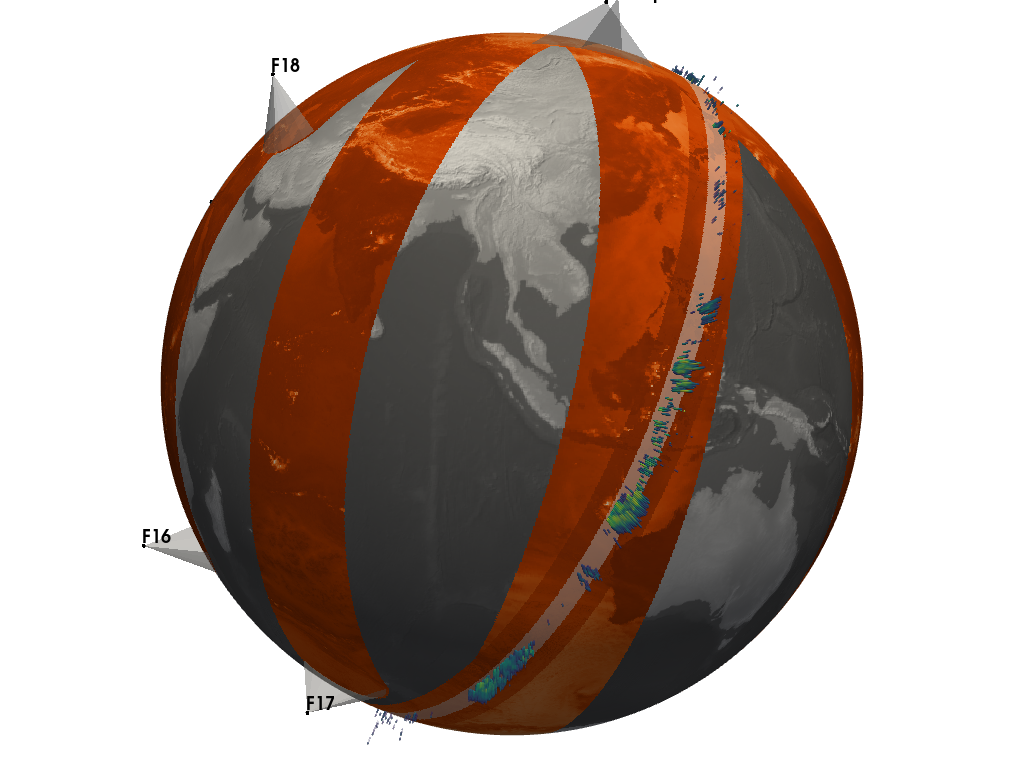

In [72]:
scene.show()

In [20]:
gmi

In [46]:
gmi.data.scan_time

<xarray.DataArray 'scan_time' (scans: 2963)>
array(['2020-04-19T01:16:56.891000000', '2020-04-19T01:16:58.766000000',
       '2020-04-19T01:17:00.641000000', ...,
       '2020-04-19T02:49:26.941000000', '2020-04-19T02:49:28.816000000',
       '2020-04-19T02:49:30.691000000'], dtype='datetime64[ns]')
Dimensions without coordinates: scans

In [ ]:
t = 0.2
for t in np.linspace(0.0, 0.5, 101):
    scene = pv.Plotter(
        line_smoothing=True,
        point_smoothing=True,
        off_screen=True
    )
    sphere = pv.Sphere(
        radius=1,
        theta_resolution=1024,
        phi_resolution=1024,
        start_theta=270.0001,
        end_theta=270.000
    )
    sphere.active_t_coords = np.zeros((sphere.points.shape[0], 2))
    sphere.active_t_coords[:, 0] = 0.75 + np.arctan2(-sphere.points[:, 0], sphere.points[:, 1]) / (2 * np.pi)
    coords = sphere.active_t_coords[:, 0]
    coords[coords < 0] += 1.0
    coords[coords > 1] -= 1.0
    sphere.active_t_coords[:, 1] = 0.5 + np.arcsin(sphere.points[:, 2]) / np.pi


    texture = Image.open("natural_earth.png").convert(mode="RGB")
    area = load_area('area.yaml', 'world') 
    for satellite in satellites:
        gpm = satellite.get_image(area, t, fade=False, duration=180)
        texture.paste(gpm, (0, 0), gpm)
    #tex = dpr.get_image(area, t)
    #if tex is not None:
    #    texture.paste(tex, (0, 0), tex)
    array = np.array(texture)
    array = array.reshape(array.shape, order="F")
    tex = pv.numpy_to_texture(array)

    for satellite in satellites:
        satellite.add_satellite(t, scene, fov=True)

    # Add labels
    #points = pv.PolyData(
    #    points
    #)
    #points["labels"] = labels

    #dpr.add_points(scene, t)

    phi = 0.55 * np.pi
    theta = 0.0
    d = 4.2
    scene.camera.position = (
        d * np.cos(theta) * np.cos(phi),
        d * np.cos(theta) * np.sin(phi),
        d * np.sin(theta)
    )
    scene.camera.focal_point = (0.0, 0.0, 0.0)


    scene.add_mesh(sphere, texture=tex)
    scene.screenshot(f"radiometer/gmi_{t}.png")
    
    scene.close()
    del scene
    del sphere
    del tex
    del array
    del coords

    #warp.plot(texture=tex, jupyter_backend="pythreejs")

In [271]:
scene.show()

NameError: name 'scene' is not defined

array(['2020-04-19T10:00:00', '2020-04-19T10:05:00',
       '2020-04-19T10:10:00', '2020-04-19T10:15:00',
       '2020-04-19T10:20:00', '2020-04-19T10:25:00',
       '2020-04-19T10:30:00', '2020-04-19T10:35:00',
       '2020-04-19T10:40:00', '2020-04-19T10:45:00',
       '2020-04-19T10:50:00', '2020-04-19T10:55:00',
       '2020-04-19T11:00:00', '2020-04-19T11:05:00',
       '2020-04-19T11:10:00', '2020-04-19T11:15:00',
       '2020-04-19T11:20:00', '2020-04-19T11:25:00',
       '2020-04-19T11:30:00', '2020-04-19T11:35:00',
       '2020-04-19T11:40:00', '2020-04-19T11:45:00',
       '2020-04-19T11:50:00', '2020-04-19T11:55:00',
       '2020-04-19T12:00:00', '2020-04-19T12:05:00',
       '2020-04-19T12:10:00', '2020-04-19T12:15:00',
       '2020-04-19T12:20:00', '2020-04-19T12:25:00',
       '2020-04-19T12:30:00', '2020-04-19T12:35:00',
       '2020-04-19T12:40:00', '2020-04-19T12:45:00',
       '2020-04-19T12:50:00', '2020-04-19T12:55:00',
       '2020-04-19T13:00:00', '2020-04-19T13:0

In [1]:
from datetime import datetime, timedelta
from pansat.products.satellite.gpm import l2a_dpr

start_time = datetime(2021, 5, 1, 0)
files = l2a_dpr.download(start_time, start_time + timedelta(hours=1))


Please enter your pansat user password:
········
https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L2/GPM_2ADPR.06/2021/121/
['"2A.GPM.DPR.V8-20180723.20210501-S233228-E010500.040763.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S185448-E202721.040760.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S141709-E154941.040757.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S202722-E215954.040761.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S154942-E172214.040758.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S124436-E141708.040756.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S093929-E111201.040754.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S111202-E124435.040755.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S063423-E080655.040752.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S002410-E015642.040748.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S032916-E050149.040750.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S080656-E093928.040753.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210501-S172

['"2A.GPM.DPR.V8-20180723.20210502-S102020-E115252.040770.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S010501-E023733.040764.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S071514-E084746.040768.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S193539-E210812.040776.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S115253-E132526.040771.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S054241-E071513.040767.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S224046-E001318.040778.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S145800-E163032.040773.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S041008-E054240.040766.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S084747-E102019.040769.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S132527-E145759.040772.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S180306-E193538.040775.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S210813-E224045.040777.V06A.HDF5"', '"2A.GPM.DPR.V8-20180723.20210502-S163033-E180305.040774.V06A.HDF5"', '"2A.GPM.DPR.V8-201

In [58]:
rr[visible].shape

(175765,)

In [88]:
import pyvista as pv
xyz = np.stack([x.ravel(), y.ravel(), z.ravel()], axis=-1)
rr = dbz.ravel()
visible = rr > -100
points = pv.PolyData(xyz[visible])
points.add_field_data(rr[visible], "radar_reflectivity")

In [86]:
points.plot?

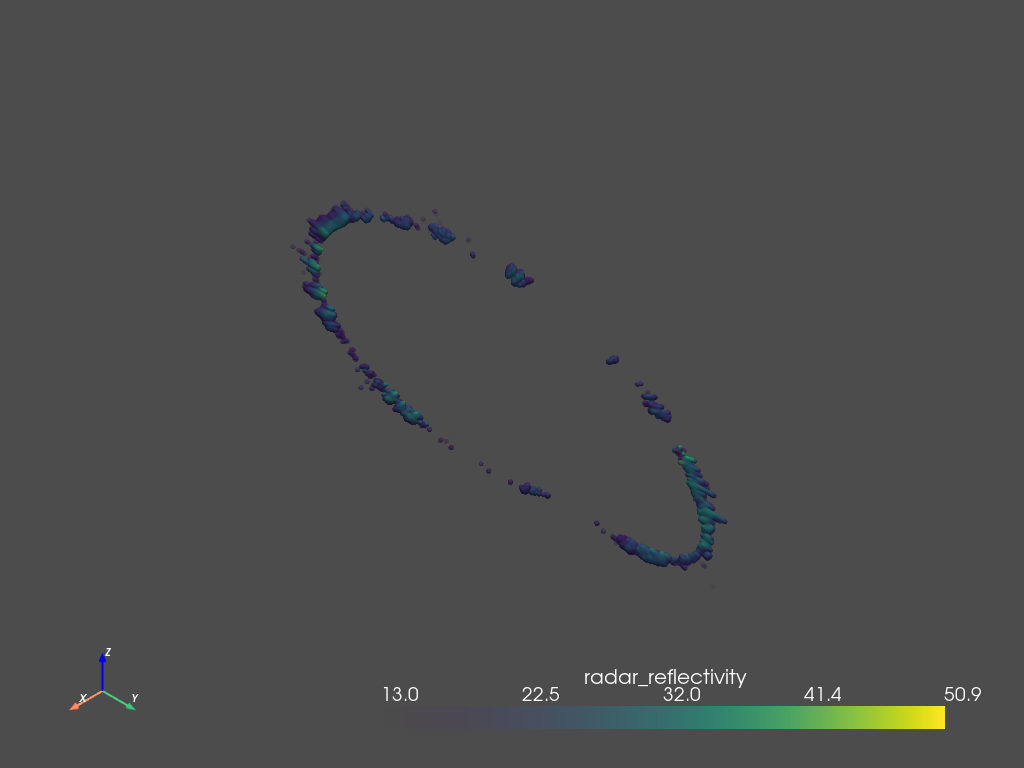

In [90]:
points.plot(scalars="radar_reflectivity", opacity="linear", render_points_as_spheres=True)

In [64]:
contours.plot(scalars="radar_reflectivity")

ValueError: Empty meshes cannot be plotted. Input mesh has zero points.

In [121]:
grid.contour(scalars="radar_reflectivity", isosurfaces=np.linspace(10, 50, 4))

TypeError: Contour filter only works on Point data. Array (radar_reflectivity) is in the Cell data.

In [106]:
z.shape

(1587, 49, 177)

In [104]:
z.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [95]:
z = np.linspace(0, 24, 177)

In [98]:
dbz.shape

(1587, 49, 176)

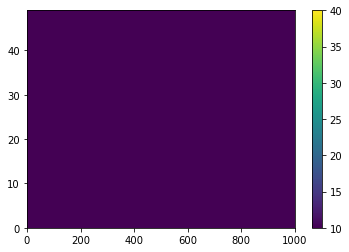

In [86]:
plt.pcolormesh(dbz[1000:2000, :, ::-1].sum(axis=-1).T, vmin=10, vmax=40)
plt.colorbar()

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

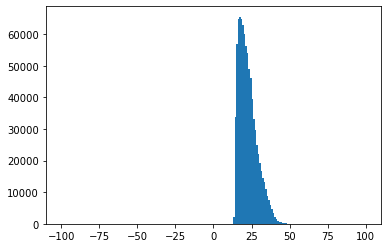

In [83]:
bins = np.linspace(-100, 100, 201)
plt.hist(dbz.ravel(), bins=bins)